## EIA Monthly Electric Grid Data - CO2 Emissions Intensity Model

Goal:  predict how adding X megawatts of solar or wind generation capacity within a Balancing Authority (BA) will affect CO2 emissions per megawatt-hour generated

Monthly generation capacity and operations data was retrieved from the U.S. Energy Information Administration API

See gencap_EDA_prep and genops_EDA_prep for data cleaning and transformation

In [1]:
import pandas as pd
import numpy as np

# load balancing authority generation configuration and operation (output) files to data frames
explan_path = 'genconf.csv'
resp_path = 'genout.csv'
genconf = pd.read_csv(explan_path, low_memory=False)
genout = pd.read_csv(resp_path, low_memory=False)

"genconf" holds monthly generation configuration data for each BA. Columns named with EIA energy source codes contain total installed generation capacity for that energy source. "av_lat" and "av_lon" contain the mean location of power plants in the BA.

In [2]:
genconf.head()

,ba_code,period,BIT,DFO,GEO,JF,KER,LIG,MSW,NG,...,SLW,SUB,SUN,TDF,WAT,WC,WND,WO,av_lat,av_lon
0,AEC,2013-01-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599
1,AEC,2013-02-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599
2,AEC,2013-03-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599
3,AEC,2013-04-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599
4,AEC,2013-05-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599


Normalize installed capacity for each energy source as a proportion of total capacity

In [3]:
# calculate total generation capacity per row
genconf['total_cap_mw'] = genconf.drop(['av_lat','av_lon'], axis=1).sum(axis=1, numeric_only=True)

In [4]:
genconf.head().T

,0,1,2,3,4
ba_code,AEC,AEC,AEC,AEC,AEC
period,2013-01-01,2013-02-01,2013-03-01,2013-04-01,2013-05-01
BIT,538.0,538.0,538.0,538.0,538.0
DFO,0.0,0.0,0.0,0.0,0.0
GEO,0.0,0.0,0.0,0.0,0.0
JF,0.0,0.0,0.0,0.0,0.0
KER,0.0,0.0,0.0,0.0,0.0
LIG,0.0,0.0,0.0,0.0,0.0
MSW,0.0,0.0,0.0,0.0,0.0
NG,1330.0,1330.0,1330.0,1330.0,1330.0


In [5]:
# divide capacity per energy source by total capacity
genconf_norm = genconf[['ba_code','period','av_lat','av_lon']].join(genconf.drop(['av_lat','av_lon'], axis=1).select_dtypes \
                                                               (include=np.number).apply(lambda x : x/genconf['total_cap_mw']))
genconf_norm.head()

,ba_code,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,LIG,...,SGP,SLW,SUB,SUN,TDF,WAT,WC,WND,WO,total_cap_mw
0,AEC,2013-01-01,31.264961,-86.674599,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,1.0
1,AEC,2013-02-01,31.264961,-86.674599,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,1.0
2,AEC,2013-03-01,31.264961,-86.674599,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,1.0
3,AEC,2013-04-01,31.264961,-86.674599,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,1.0
4,AEC,2013-05-01,31.264961,-86.674599,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,1.0


Normalize average latitude and longitude features

In [6]:
#normalize latitude to range 0,1
genconf_norm['av_lat'] = genconf_norm['av_lat'].apply(lambda x: (x-genconf_norm['av_lat'].min())/(genconf_norm['av_lat'].max() \
                                                                       - genconf_norm['av_lat'].min()))

In [7]:
#normalize longitude to range 0,1
genconf_norm['av_lon'] = genconf_norm['av_lon'].apply(lambda x: (x-genconf_norm['av_lon'].min())/(genconf_norm['av_lon'].max() \
                                                                       - genconf_norm['av_lon'].min()))

In [8]:
genconf_norm.head()

,ba_code,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,LIG,...,SGP,SLW,SUB,SUN,TDF,WAT,WC,WND,WO,total_cap_mw
0,AEC,2013-01-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,1.0
1,AEC,2013-02-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,1.0
2,AEC,2013-03-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,1.0
3,AEC,2013-04-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,1.0
4,AEC,2013-05-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,1.0


In [9]:
genconf_norm = genconf_norm.drop(columns='total_cap_mw')
genconf_norm.head()

,ba_code,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,LIG,...,SGC,SGP,SLW,SUB,SUN,TDF,WAT,WC,WND,WO
0,AEC,2013-01-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0
1,AEC,2013-02-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0
2,AEC,2013-03-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0
3,AEC,2013-04-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0
4,AEC,2013-05-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0


"genout" contains monthly data for each BA:  net electricity generated (megawatt-hours), CO2 emitted (metric kilotons), and Carbon Intensity aka specific CO2 emission (kilograms per megawatt-hour)

In [10]:
genout.head()

,Unnamed: 0,period,ba_code,gen_mwh,co2_kton,kg_co2_per_mwh
0,0,2018-01-01,AECI,958175.40,371.621725,387.843107
1,1,2018-01-01,AVA,33918.92,0.131717,3.883279
2,2,2018-01-01,AZPS,488107.34,499.032994,1022.383712
3,3,2018-01-01,BANC,26750.40,0.000000,0.000000
4,4,2018-01-01,BPAT,468206.84,6.600204,14.096769


In [11]:
genout = genout[['ba_code', 'period', 'gen_mwh', 'co2_kton', 'kg_co2_per_mwh']]

In [12]:
genout.head()

,ba_code,period,gen_mwh,co2_kton,kg_co2_per_mwh
0,AECI,2018-01-01,958175.40,371.621725,387.843107
1,AVA,2018-01-01,33918.92,0.131717,3.883279
2,AZPS,2018-01-01,488107.34,499.032994,1022.383712
3,BANC,2018-01-01,26750.40,0.000000,0.000000
4,BPAT,2018-01-01,468206.84,6.600204,14.096769


Normalize electricity generated as a proportion of total capacity. Intent is to use this as a feature representing how much of its capacity a BA used on average.

In [13]:
# join total generation capacity to genout
genout_norm = genout.set_index(['ba_code','period']).join(genconf[['ba_code','period','total_cap_mw']].set_index(['ba_code','period']))
genout_norm.head()

,,gen_mwh,co2_kton,kg_co2_per_mwh,total_cap_mw
ba_code,period,,,,
AECI,2018-01-01,958175.40,371.621725,387.843107,6166.7
AVA,2018-01-01,33918.92,0.131717,3.883279,2088.6
AZPS,2018-01-01,488107.34,499.032994,1022.383712,5671.8
BANC,2018-01-01,26750.40,0.000000,0.000000,2789.0
BPAT,2018-01-01,468206.84,6.600204,14.096769,27798.8


In [14]:
# normalize using capacity * time, i.e. how much could a BA generate in a month if 
# running all generators at 100% capacity
# using 31 days per month in an effort to keep result <= 1.
genout_norm['avg_mw_per_cap'] = genout_norm['gen_mwh']/(genout_norm['total_cap_mw']*31*24)

In [15]:
genout_norm.tail()

,,gen_mwh,co2_kton,kg_co2_per_mwh,total_cap_mw,avg_mw_per_cap
ba_code,period,,,,,
TEPC,2022-12-01,1771968.52,1731.628946,977.234599,171.7,13.871160
TIDC,2022-12-01,13202.00,0.000000,0.000000,NaN,NaN
TVA,2022-12-01,11837943.20,3733.005465,315.342404,1057.0,15.053183
WACM,2022-12-01,1865648.00,1570.704010,841.908018,3313.0,0.756894
WALC,2022-12-01,2353672.00,748.334332,317.943338,2032.2,1.556706


In [16]:
genout_norm = genout_norm.reset_index()

<Axes: xlabel='period'>

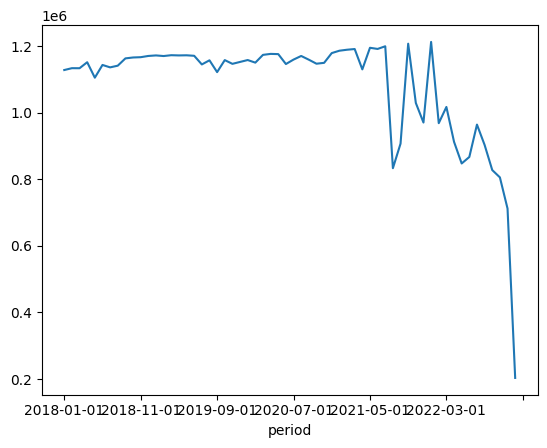

In [17]:
genout_norm.groupby('period')['total_cap_mw'].sum().plot(x='period',y='total_cap_mw')

Based on above, suspect missing data in 2022. EIA website states that data is not finalized until the fall following the reporting year.

In [18]:
# remove rows with nonsense generation values (generation exceeds reported capacity)
genout_norm = genout_norm[genout_norm.avg_mw_per_cap <= 1]

In [19]:
genout_norm.head()

,ba_code,period,gen_mwh,co2_kton,kg_co2_per_mwh,total_cap_mw,avg_mw_per_cap
0,AECI,2018-01-01,958175.40,371.621725,387.843107,6166.7,0.208843
1,AVA,2018-01-01,33918.92,0.131717,3.883279,2088.6,0.021828
2,AZPS,2018-01-01,488107.34,499.032994,1022.383712,5671.8,0.115670
3,BANC,2018-01-01,26750.40,0.000000,0.000000,2789.0,0.012892
4,BPAT,2018-01-01,468206.84,6.600204,14.096769,27798.8,0.022638


In [20]:
# remove unneeded columns (intermediates)
genout_norm = genout_norm[['ba_code','period','avg_mw_per_cap','kg_co2_per_mwh']]
genout_norm.head()

,ba_code,period,avg_mw_per_cap,kg_co2_per_mwh
0,AECI,2018-01-01,0.208843,387.843107
1,AVA,2018-01-01,0.021828,3.883279
2,AZPS,2018-01-01,0.115670,1022.383712
3,BANC,2018-01-01,0.012892,0.000000
4,BPAT,2018-01-01,0.022638,14.096769


Add features to reflect hypothesized annual and 6-month seasonality. Seasonal variations are expected in solar irradiance (annual cycle) and demand (~6-month cycle due to heating demand in winter and cooling demand in summer)

In [21]:
genout_norm['period'] = pd.to_datetime(genout_norm['period'])


In [22]:
# create Julian date column (days since noon on 1 Jan 4713 BC)
genout_norm['julian'] = genout_norm['period'].apply(lambda x : pd.Timestamp(x).to_julian_date())

In [23]:
# create sine and cosine of time features
genout_norm['sin_year'] = np.sin(genout_norm['julian'] / 365.25 * 2 * np.pi)
genout_norm['cos_year'] = np.cos(genout_norm['julian'] / 365.25 * 2 * np.pi)
genout_norm['sin_6mo'] = np.sin(genout_norm['julian'] / (365.25/2) * 2 * np.pi)
genout_norm['cos_6mo'] = np.cos(genout_norm['julian'] / (365.25/2) * 2 * np.pi)
genout_norm['sin_8mo'] = np.sin(genout_norm['julian'] / (365.25*(8/12)) * 2 * np.pi)
genout_norm['cos_8mo'] = np.cos(genout_norm['julian'] / (365.25*(8/12)) * 2 * np.pi)
genout_norm['sin_13mo'] = np.sin(genout_norm['julian'] / (365.25*(13/12)) * 2 * np.pi)
genout_norm['cos_13mo'] = np.cos(genout_norm['julian'] / (365.25*(13/12)) * 2 * np.pi)

In [24]:
genout_norm = genout_norm[['ba_code', 'period', 'sin_year', 'cos_year', 'sin_6mo', 'cos_6mo', 'sin_8mo' \
    , 'cos_8mo', 'sin_13mo', 'cos_13mo', 'avg_mw_per_cap', 'kg_co2_per_mwh']]

In [25]:
genout_norm.head()

,ba_code,period,sin_year,cos_year,sin_6mo,cos_6mo,sin_8mo,cos_8mo,sin_13mo,cos_13mo,avg_mw_per_cap,kg_co2_per_mwh
0,AECI,2018-01-01,-0.221772,0.975099,-0.432499,0.901634,-0.329192,0.944263,0.987847,-0.15543,0.208843,387.843107
1,AVA,2018-01-01,-0.221772,0.975099,-0.432499,0.901634,-0.329192,0.944263,0.987847,-0.15543,0.021828,3.883279
2,AZPS,2018-01-01,-0.221772,0.975099,-0.432499,0.901634,-0.329192,0.944263,0.987847,-0.15543,0.115670,1022.383712
3,BANC,2018-01-01,-0.221772,0.975099,-0.432499,0.901634,-0.329192,0.944263,0.987847,-0.15543,0.012892,0.000000
4,BPAT,2018-01-01,-0.221772,0.975099,-0.432499,0.901634,-0.329192,0.944263,0.987847,-0.15543,0.022638,14.096769


Join generation configuration and generation output data frames 

In [26]:
gen_norm = genconf_norm.set_index(['ba_code', 'period']).join(genout_norm.set_index(['ba_code', 'period']))

In [27]:
gen_norm.head()

av_lat    av_lon       BIT  DFO  GEO   JF  KER  LIG   
ba_code period                                                              
AEC     2013-01-01  0.247995  0.704795  0.286018  0.0  0.0  0.0  0.0  0.0  \
        2013-02-01  0.247995  0.704795  0.286018  0.0  0.0  0.0  0.0  0.0   
        2013-03-01  0.247995  0.704795  0.286018  0.0  0.0  0.0  0.0  0.0   
        2013-04-01  0.247995  0.704795  0.286018  0.0  0.0  0.0  0.0  0.0   
        2013-05-01  0.247995  0.704795  0.286018  0.0  0.0  0.0  0.0  0.0   

                    MSW        NG  ...  sin_year  cos_year  sin_6mo  cos_6mo   
ba_code period                     ...                                         
AEC     2013-01-01  0.0  0.707071  ...       NaN       NaN      NaN      NaN  \
        2013-02-01  0.0  0.707071  ...       NaN       NaN      NaN      NaN   
        2013-03-01  0.0  0.707071  ...       NaN       NaN      NaN      NaN   
        2013-04-01  0.0  0.707071  ...       NaN       NaN      NaN      NaN   
        2013-05-01  0.0  0.707071  ...       NaN       NaN      NaN      NaN   

                    sin_8mo  cos_8mo  sin_13mo  cos_13mo  avg_mw_per_cap   
ba_code period                                                             
AEC     2013-01-01      NaN      NaN       NaN       NaN             NaN  \
        2013-02-01      NaN      NaN       NaN       NaN             NaN   
        2013-03-01      NaN      NaN       NaN       NaN             NaN   
        2013-04-01      NaN      NaN       NaN       NaN             NaN   
        2013-05-01      NaN      NaN       NaN       NaN             NaN   

                    kg_co2_per_mwh  
ba_code period                      
AEC     2013-01-01             NaN  
        2013-02-01             NaN  
        2013-03-01             NaN  
        2013-04-01             NaN  
        2013-05-01             NaN  

[5 rows x 36 columns]

In [28]:
gen_norm = gen_norm.reset_index()

In [29]:
ng_price_path = 'NG_price.csv'
ng_price = pd.read_csv(ng_price_path, low_memory=False)
ng_price.head()

,period,NG_price
0,1997-01-01,3.45
1,1997-02-01,2.15
2,1997-03-01,1.89
3,1997-04-01,2.03
4,1997-05-01,2.25


In [30]:
gen_norm = gen_norm.set_index(['period']).join(ng_price.set_index('period')).reset_index()

In [31]:
gen_norm.head()

,period,ba_code,av_lat,av_lon,BIT,DFO,GEO,JF,KER,LIG,...,cos_year,sin_6mo,cos_6mo,sin_8mo,cos_8mo,sin_13mo,cos_13mo,avg_mw_per_cap,kg_co2_per_mwh,NG_price
0,2013-01-01,AEC,0.247995,0.704795,0.286018,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.33
1,2013-01-01,AECI,0.601600,0.588005,0.000000,0.023496,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.33
2,2013-01-01,AVA,0.953613,0.107221,0.000000,0.001394,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.33
3,2013-01-01,AZPS,0.341446,0.199516,0.328200,0.017902,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.33
4,2013-01-01,BANC,0.562908,0.027251,0.000000,0.051919,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.33


In [32]:
gen_norm = gen_norm.dropna()

In [33]:
gen_norm = gen_norm.reset_index()
gen_norm.head()

,index,period,ba_code,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,cos_year,sin_6mo,cos_6mo,sin_8mo,cos_8mo,sin_13mo,cos_13mo,avg_mw_per_cap,kg_co2_per_mwh,NG_price
0,3653,2018-01-01,AECI,0.601600,0.588005,0.0,0.016800,0.000000,0.0,0.0,...,0.975099,-0.432499,0.901634,-0.329192,0.944263,0.987847,-0.15543,0.208843,387.843107,3.87
1,3654,2018-01-01,AVA,0.953613,0.107221,0.0,0.001341,0.000000,0.0,0.0,...,0.975099,-0.432499,0.901634,-0.329192,0.944263,0.987847,-0.15543,0.021828,3.883279,3.87
2,3656,2018-01-01,AZPS,0.341446,0.199516,0.0,0.021827,0.000000,0.0,0.0,...,0.975099,-0.432499,0.901634,-0.329192,0.944263,0.987847,-0.15543,0.115670,1022.383712,3.87
3,3657,2018-01-01,BANC,0.562908,0.027251,0.0,0.025887,0.000000,0.0,0.0,...,0.975099,-0.432499,0.901634,-0.329192,0.944263,0.987847,-0.15543,0.012892,0.000000,3.87
4,3658,2018-01-01,BPAT,0.885465,0.057783,0.0,0.000000,0.000648,0.0,0.0,...,0.975099,-0.432499,0.901634,-0.329192,0.944263,0.987847,-0.15543,0.022638,14.096769,3.87


In [34]:
move_col = gen_norm.pop('ba_code')
gen_norm.insert(0, move_col.name, move_col)
gen_norm.head()

,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,cos_year,sin_6mo,cos_6mo,sin_8mo,cos_8mo,sin_13mo,cos_13mo,avg_mw_per_cap,kg_co2_per_mwh,NG_price
0,AECI,3653,2018-01-01,0.601600,0.588005,0.0,0.016800,0.000000,0.0,0.0,...,0.975099,-0.432499,0.901634,-0.329192,0.944263,0.987847,-0.15543,0.208843,387.843107,3.87
1,AVA,3654,2018-01-01,0.953613,0.107221,0.0,0.001341,0.000000,0.0,0.0,...,0.975099,-0.432499,0.901634,-0.329192,0.944263,0.987847,-0.15543,0.021828,3.883279,3.87
2,AZPS,3656,2018-01-01,0.341446,0.199516,0.0,0.021827,0.000000,0.0,0.0,...,0.975099,-0.432499,0.901634,-0.329192,0.944263,0.987847,-0.15543,0.115670,1022.383712,3.87
3,BANC,3657,2018-01-01,0.562908,0.027251,0.0,0.025887,0.000000,0.0,0.0,...,0.975099,-0.432499,0.901634,-0.329192,0.944263,0.987847,-0.15543,0.012892,0.000000,3.87
4,BPAT,3658,2018-01-01,0.885465,0.057783,0.0,0.000000,0.000648,0.0,0.0,...,0.975099,-0.432499,0.901634,-0.329192,0.944263,0.987847,-0.15543,0.022638,14.096769,3.87


In [35]:
gen_norm.columns

Index(['ba_code', 'index', 'period', 'av_lat', 'av_lon', 'BIT', 'DFO', 'GEO',
       'JF', 'KER', 'LIG', 'MSW', 'NG', 'NUC', 'OTH', 'PC', 'PG', 'RC', 'RFO',
       'SGC', 'SGP', 'SLW', 'SUB', 'SUN', 'TDF', 'WAT', 'WC', 'WND', 'WO',
       'sin_year', 'cos_year', 'sin_6mo', 'cos_6mo', 'sin_8mo', 'cos_8mo',
       'sin_13mo', 'cos_13mo', 'avg_mw_per_cap', 'kg_co2_per_mwh', 'NG_price'],
      dtype='object')

In [36]:
move_col = gen_norm.pop('NG_price')
gen_norm.insert(gen_norm.columns.get_loc('avg_mw_per_cap'), move_col.name, move_col)
gen_norm.head()

,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,cos_year,sin_6mo,cos_6mo,sin_8mo,cos_8mo,sin_13mo,cos_13mo,NG_price,avg_mw_per_cap,kg_co2_per_mwh
0,AECI,3653,2018-01-01,0.601600,0.588005,0.0,0.016800,0.000000,0.0,0.0,...,0.975099,-0.432499,0.901634,-0.329192,0.944263,0.987847,-0.15543,3.87,0.208843,387.843107
1,AVA,3654,2018-01-01,0.953613,0.107221,0.0,0.001341,0.000000,0.0,0.0,...,0.975099,-0.432499,0.901634,-0.329192,0.944263,0.987847,-0.15543,3.87,0.021828,3.883279
2,AZPS,3656,2018-01-01,0.341446,0.199516,0.0,0.021827,0.000000,0.0,0.0,...,0.975099,-0.432499,0.901634,-0.329192,0.944263,0.987847,-0.15543,3.87,0.115670,1022.383712
3,BANC,3657,2018-01-01,0.562908,0.027251,0.0,0.025887,0.000000,0.0,0.0,...,0.975099,-0.432499,0.901634,-0.329192,0.944263,0.987847,-0.15543,3.87,0.012892,0.000000
4,BPAT,3658,2018-01-01,0.885465,0.057783,0.0,0.000000,0.000648,0.0,0.0,...,0.975099,-0.432499,0.901634,-0.329192,0.944263,0.987847,-0.15543,3.87,0.022638,14.096769


In [37]:
# normalize natural gas price
gen_norm['NG_price'] = (gen_norm['NG_price'] - gen_norm['NG_price'].min())/(gen_norm['NG_price'].max() \
    - gen_norm['NG_price'].min())

In [38]:
gen_norm.head()

,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,cos_year,sin_6mo,cos_6mo,sin_8mo,cos_8mo,sin_13mo,cos_13mo,NG_price,avg_mw_per_cap,kg_co2_per_mwh
0,AECI,3653,2018-01-01,0.601600,0.588005,0.0,0.016800,0.000000,0.0,0.0,...,0.975099,-0.432499,0.901634,-0.329192,0.944263,0.987847,-0.15543,0.311978,0.208843,387.843107
1,AVA,3654,2018-01-01,0.953613,0.107221,0.0,0.001341,0.000000,0.0,0.0,...,0.975099,-0.432499,0.901634,-0.329192,0.944263,0.987847,-0.15543,0.311978,0.021828,3.883279
2,AZPS,3656,2018-01-01,0.341446,0.199516,0.0,0.021827,0.000000,0.0,0.0,...,0.975099,-0.432499,0.901634,-0.329192,0.944263,0.987847,-0.15543,0.311978,0.115670,1022.383712
3,BANC,3657,2018-01-01,0.562908,0.027251,0.0,0.025887,0.000000,0.0,0.0,...,0.975099,-0.432499,0.901634,-0.329192,0.944263,0.987847,-0.15543,0.311978,0.012892,0.000000
4,BPAT,3658,2018-01-01,0.885465,0.057783,0.0,0.000000,0.000648,0.0,0.0,...,0.975099,-0.432499,0.901634,-0.329192,0.944263,0.987847,-0.15543,0.311978,0.022638,14.096769


In [39]:
gen_norm = gen_norm.sort_values(by=['ba_code','period'])

In [40]:
gen_norm = gen_norm[gen_norm.kg_co2_per_mwh > 0]

<Axes: xlabel='period'>

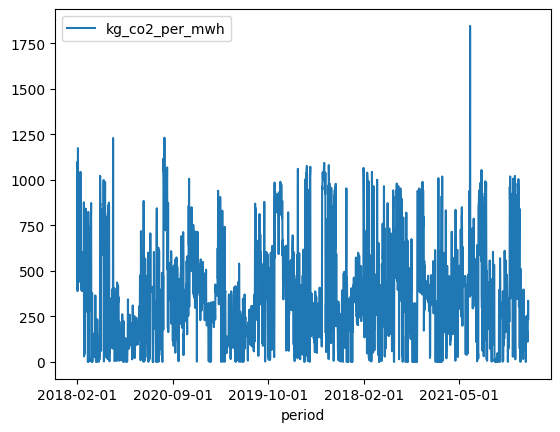

In [41]:
gen_norm.plot(x='period',y='kg_co2_per_mwh')

Use Fast Fourier Transform to check for actual seasonality in the response variable

In [42]:
ci_monthly = gen_norm.groupby('period')['kg_co2_per_mwh'].mean()
ci_monthly.head()

period
2018-01-01    533.564330
2018-02-01    402.807366
2018-03-01    360.518434
2018-04-01    471.236055
2018-05-01    293.358891
Name: kg_co2_per_mwh, dtype: float64

In [43]:
type(ci_monthly)

pandas.core.series.Series

Text(0.5, 0, '# Cycles in full window of data (~5 years)')

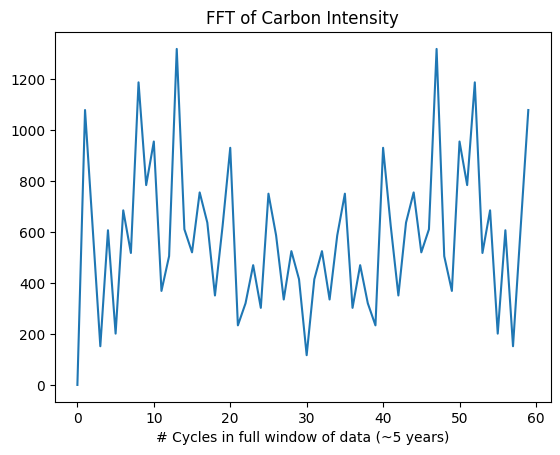

In [44]:
from scipy.fftpack import fft
import numpy as np
import matplotlib.pyplot as plt

# apply FFT to emissions intensity deviation from mean
fft_ci = fft((ci_monthly - ci_monthly.mean()).values)

# plot emissions intensity deviation in frequency domain
plt.plot(np.abs(fft_ci))
plt.title("FFT of Carbon Intensity")
plt.xlabel('# Cycles in full window of data (~5 years)')

Text(0.5, 0, 'Frequency ($y^{-1}$)')

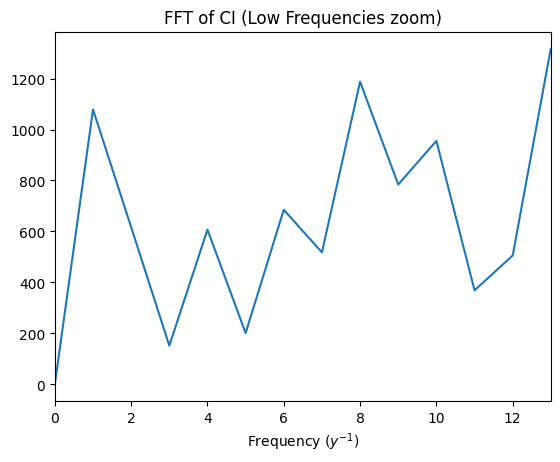

In [45]:
# zoom on sub-annual frequencies
plt.plot(np.abs(fft_ci))
plt.title("FFT of CI (Low Frequencies zoom)")
plt.xlim([0,13])
plt.xlabel('Frequency ($y^{-1}$)')

Examine features graphically

In [46]:
gen_norm.columns

Index(['ba_code', 'index', 'period', 'av_lat', 'av_lon', 'BIT', 'DFO', 'GEO',
       'JF', 'KER', 'LIG', 'MSW', 'NG', 'NUC', 'OTH', 'PC', 'PG', 'RC', 'RFO',
       'SGC', 'SGP', 'SLW', 'SUB', 'SUN', 'TDF', 'WAT', 'WC', 'WND', 'WO',
       'sin_year', 'cos_year', 'sin_6mo', 'cos_6mo', 'sin_8mo', 'cos_8mo',
       'sin_13mo', 'cos_13mo', 'NG_price', 'avg_mw_per_cap', 'kg_co2_per_mwh'],
      dtype='object')

C:\Users\lilye\AppData\Local\Temp\ipykernel_16304\3986892565.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


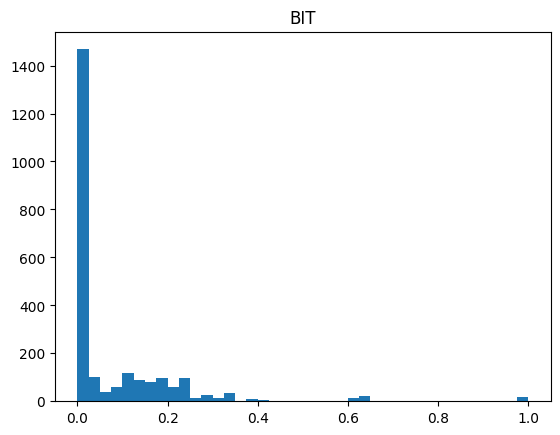

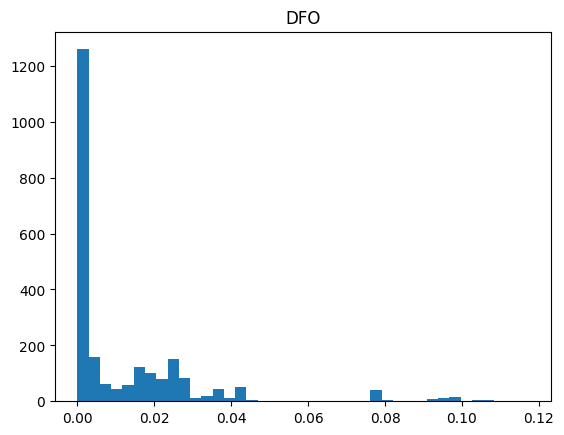

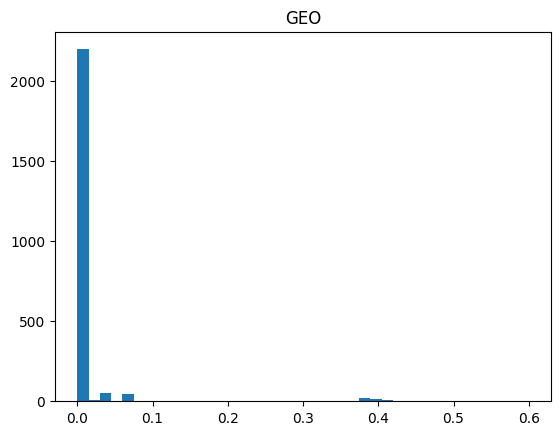

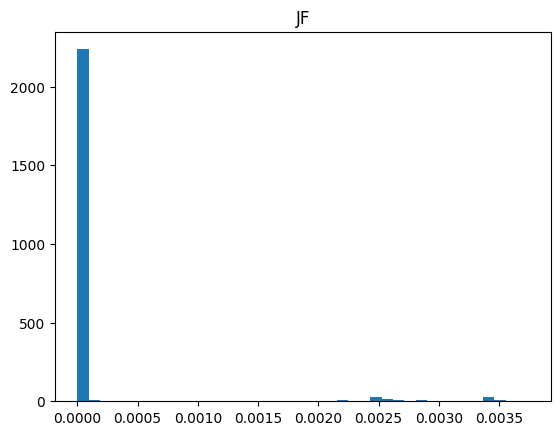

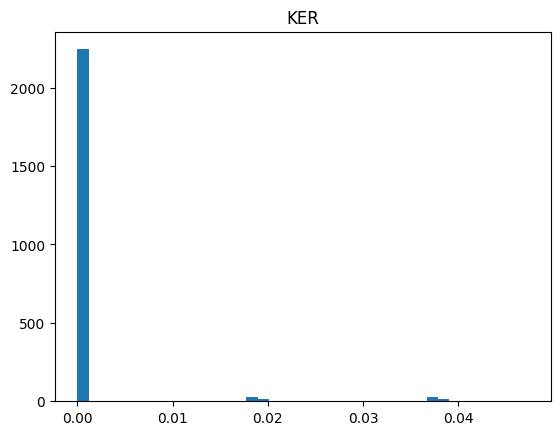

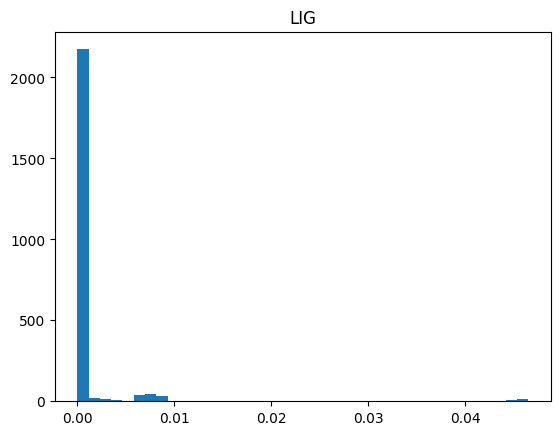

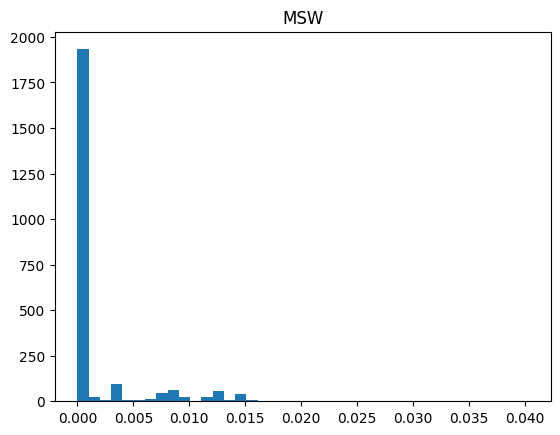

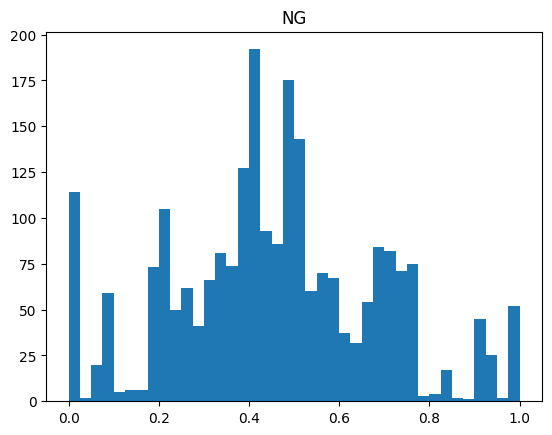

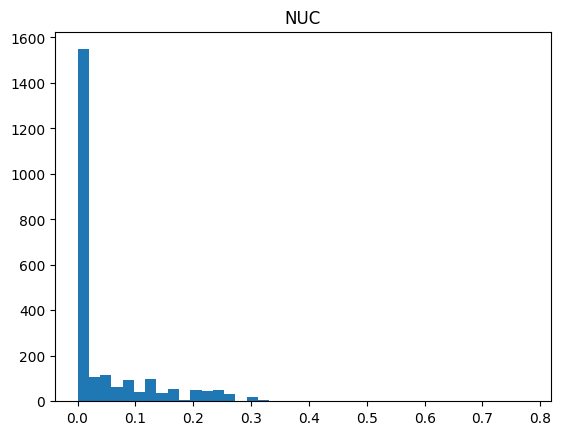

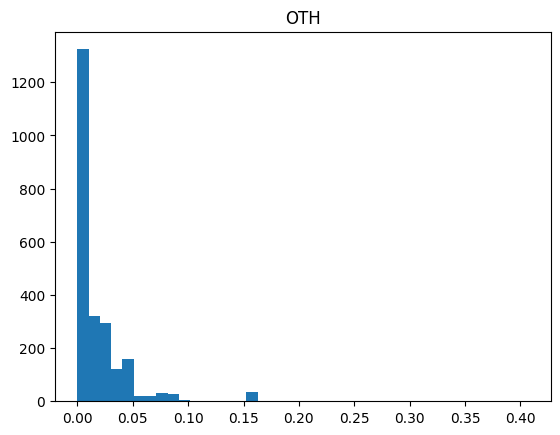

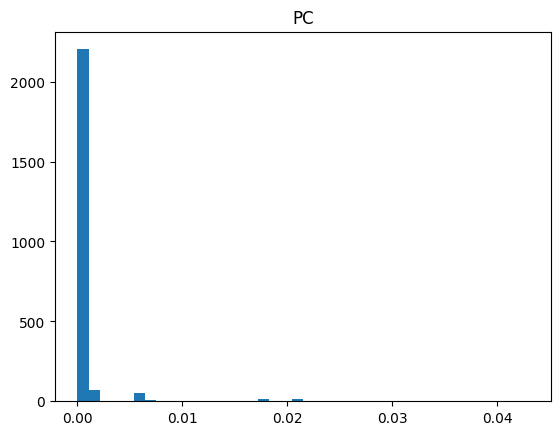

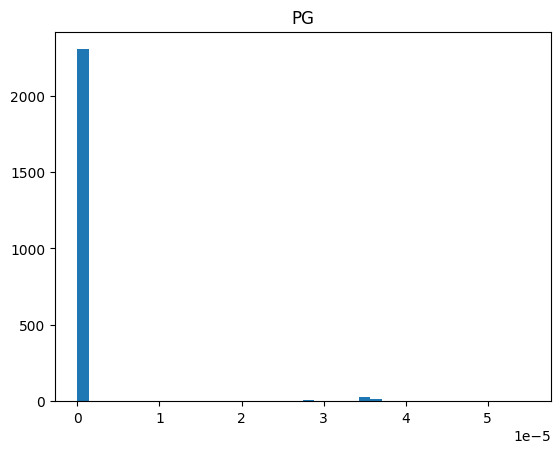

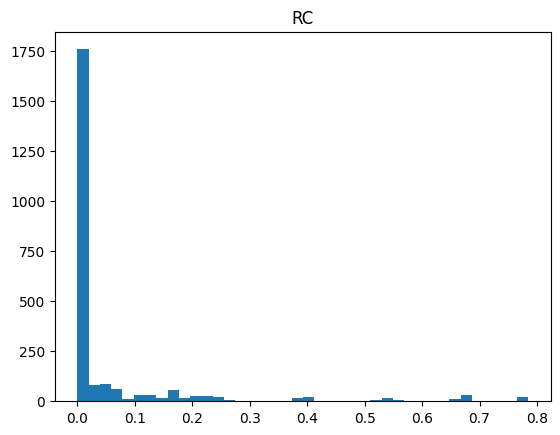

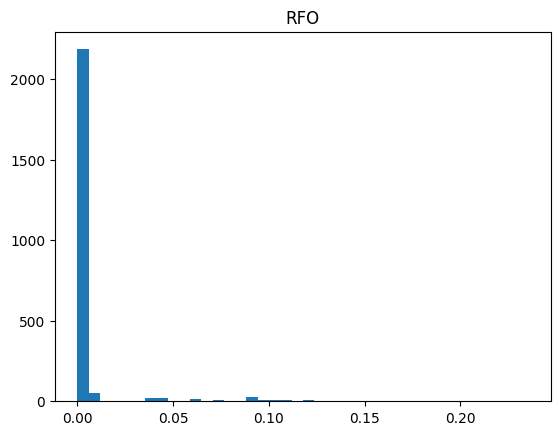

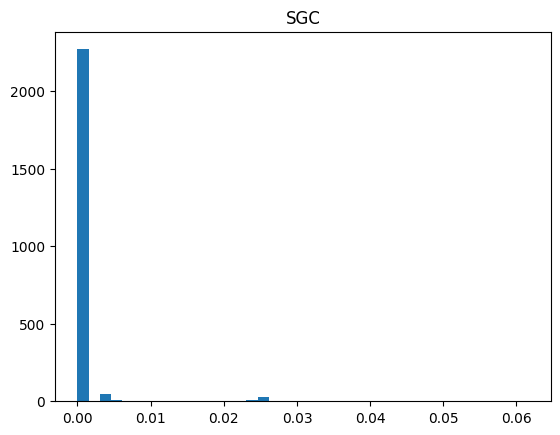

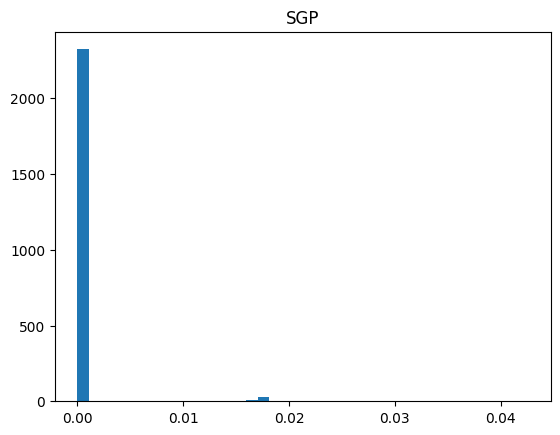

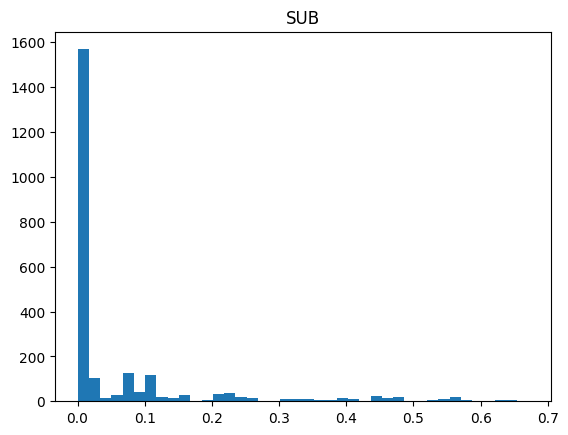

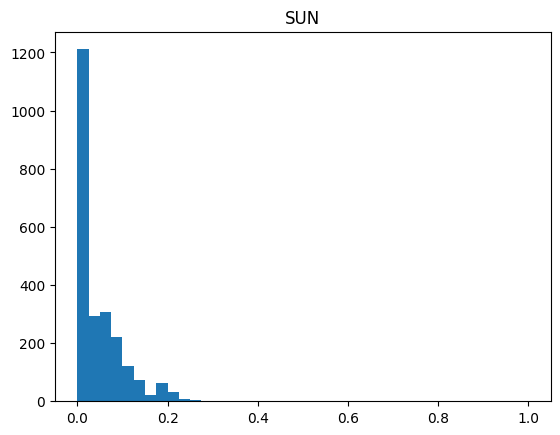

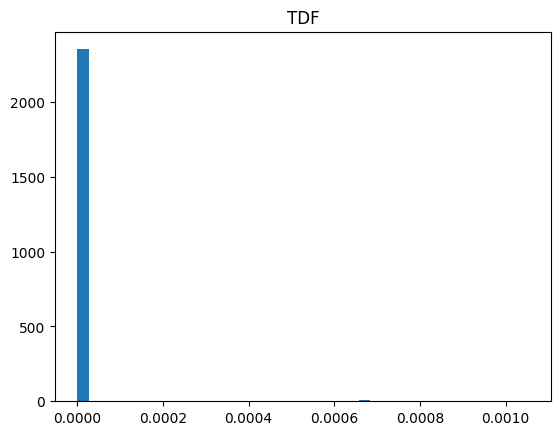

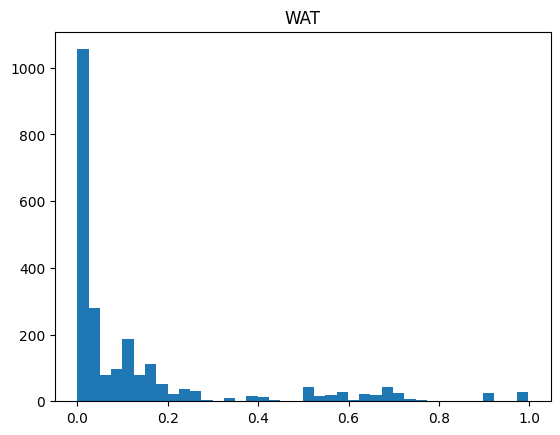

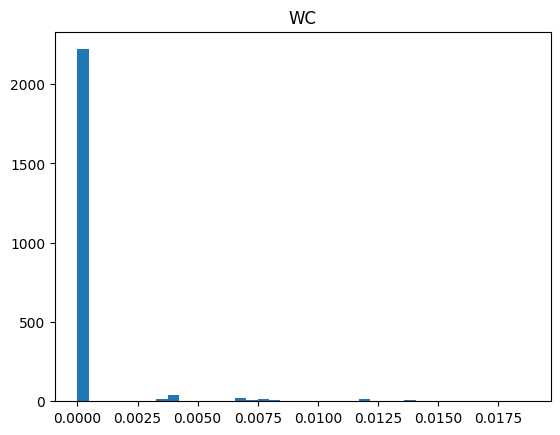

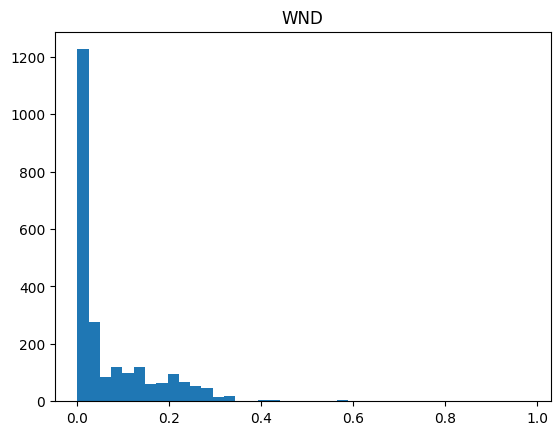

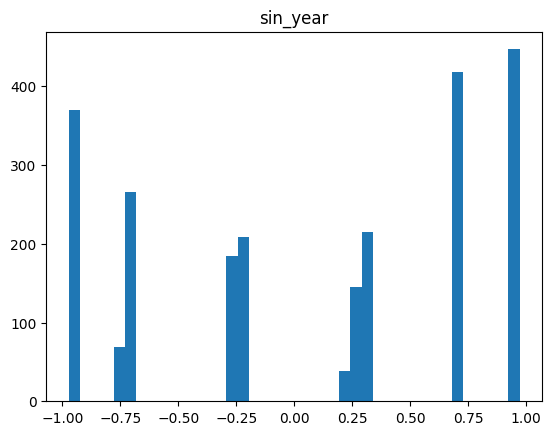

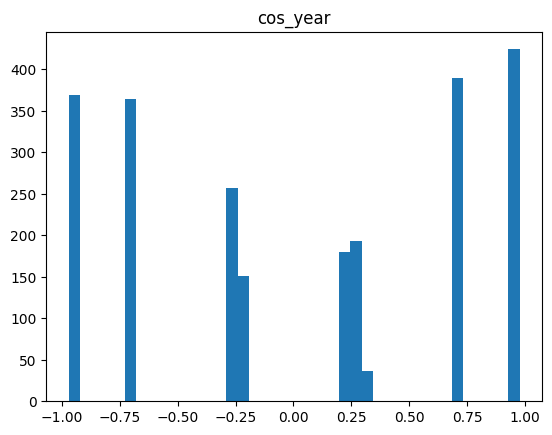

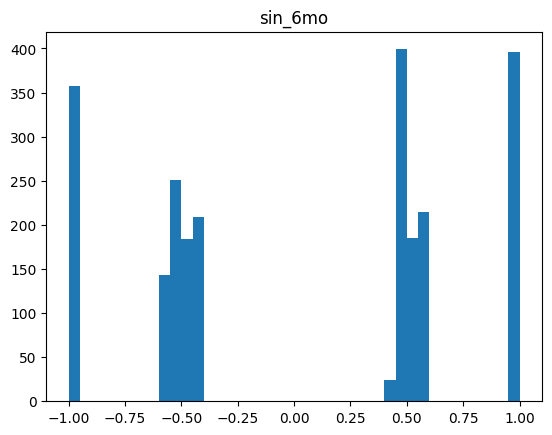

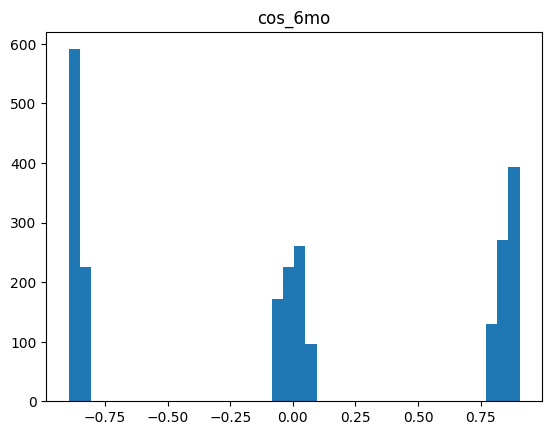

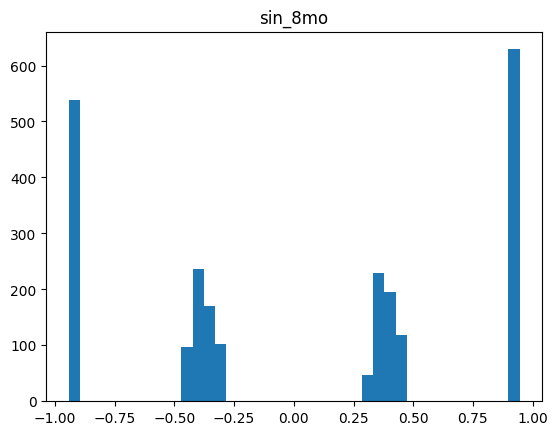

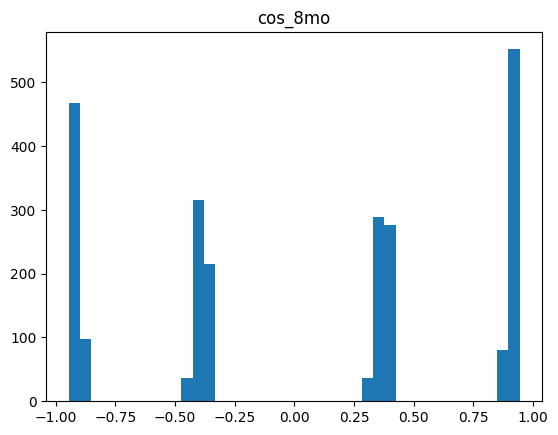

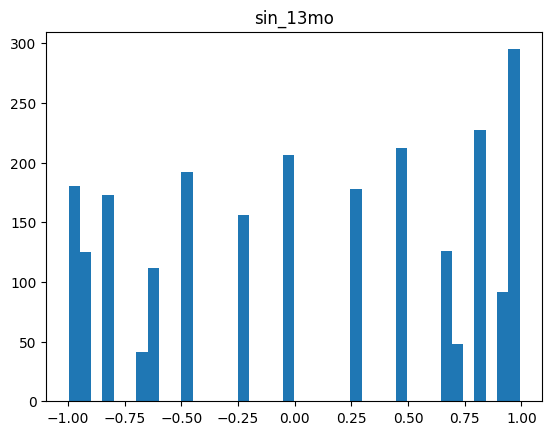

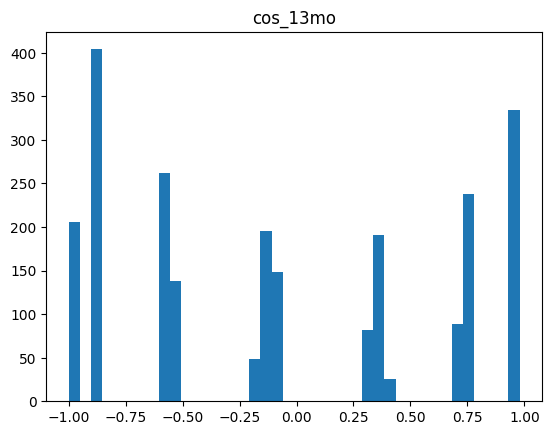

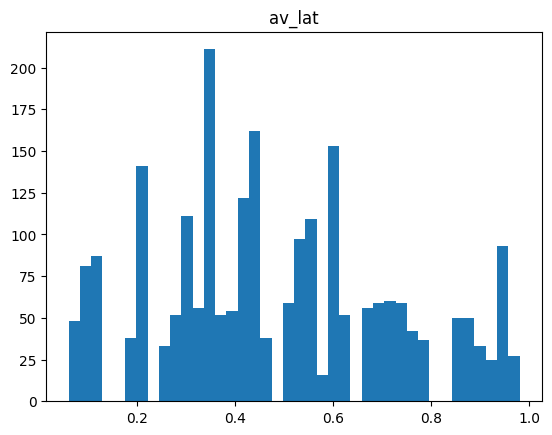

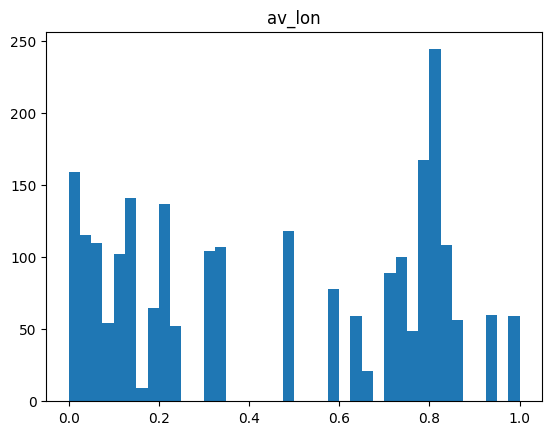

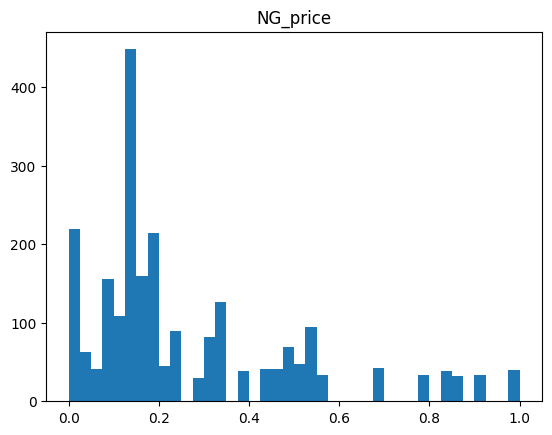

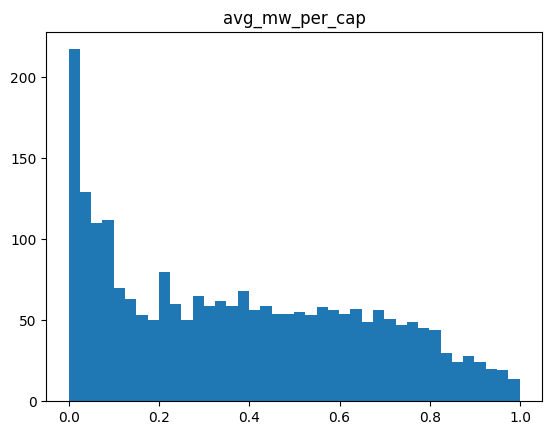

In [47]:
X_names = ['BIT', 'DFO', 'GEO', 'JF', 'KER', 'LIG', 'MSW', 'NG', 'NUC', 'OTH'
       ,'PC', 'PG', 'RC', 'RFO', 'SGC', 'SGP', 'SUB', 'SUN', 'TDF', 'WAT', 'WC'
       ,'WND', 'sin_year', 'cos_year', 'sin_6mo', 'cos_6mo', 'sin_8mo', 'cos_8mo'
       , 'sin_13mo', 'cos_13mo', 'av_lat', 'av_lon' 
       , 'NG_price', 'avg_mw_per_cap'
       ]
for X in X_names:
    plt.figure()
    plt.title(X)
    plt.hist(gen_norm[X], bins=40)


In [48]:
gen_norm.head()

,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,cos_year,sin_6mo,cos_6mo,sin_8mo,cos_8mo,sin_13mo,cos_13mo,NG_price,avg_mw_per_cap,kg_co2_per_mwh
49,AEC,3718,2018-02-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0.952442,0.580455,0.814292,0.447945,0.894061,0.797102,-0.603845,0.144847,0.450533,390.277157
98,AEC,3784,2018-03-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0.702913,0.999930,-0.011826,0.927238,0.374474,0.459883,-0.887979,0.147632,0.082369,1100.658028
142,AEC,3850,2018-04-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0.243730,0.472759,-0.881192,0.914679,-0.404181,-0.014390,-0.999896,0.162953,0.488232,396.081591
193,AEC,3916,2018-05-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,-0.266599,-0.513901,-0.857849,0.371481,-0.928441,-0.471301,-0.881972,0.162953,0.004138,1174.561209
326,AEC,4114,2018-08-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,-0.960587,0.534046,0.845455,-0.912053,0.410073,-0.928348,0.371711,0.185237,0.176916,604.078432


Most features appear right-skewed. Apply log transform using log(1+X). Avoids undefined result at log(0).

In [49]:
import numpy as np

# list feature names to log transform
X_log_names = ['BIT', 'DFO', 'GEO', 'JF', 'KER', 'LIG', 'MSW', 'NG', 'NUC', 'OTH',
       'PC', 'PG', 'RC', 'RFO', 'SGC', 'SGP', 'SUB', 'SUN', 'TDF', 'WAT', 'WC',
       'WND', 'NG_price', 'avg_mw_per_cap']

# copy the dataset. Don't use 'new_df = old_df', as changes will retroactively apply to 'old_df'
gen_norm_log = gen_norm.copy()
gen_norm_log[X_log_names] = gen_norm_log[X_log_names].apply(lambda x: np.log(1+x))
gen_norm_log.head()


,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,cos_year,sin_6mo,cos_6mo,sin_8mo,cos_8mo,sin_13mo,cos_13mo,NG_price,avg_mw_per_cap,kg_co2_per_mwh
49,AEC,3718,2018-02-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,...,0.952442,0.580455,0.814292,0.447945,0.894061,0.797102,-0.603845,0.135271,0.371931,390.277157
98,AEC,3784,2018-03-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,...,0.702913,0.999930,-0.011826,0.927238,0.374474,0.459883,-0.887979,0.137701,0.079152,1100.658028
142,AEC,3850,2018-04-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,...,0.243730,0.472759,-0.881192,0.914679,-0.404181,-0.014390,-0.999896,0.150962,0.397589,396.081591
193,AEC,3916,2018-05-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,...,-0.266599,-0.513901,-0.857849,0.371481,-0.928441,-0.471301,-0.881972,0.150962,0.004129,1174.561209
326,AEC,4114,2018-08-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,...,-0.960587,0.534046,0.845455,-0.912053,0.410073,-0.928348,0.371711,0.169943,0.162897,604.078432


In [50]:
gen_norm.head()

,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,cos_year,sin_6mo,cos_6mo,sin_8mo,cos_8mo,sin_13mo,cos_13mo,NG_price,avg_mw_per_cap,kg_co2_per_mwh
49,AEC,3718,2018-02-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0.952442,0.580455,0.814292,0.447945,0.894061,0.797102,-0.603845,0.144847,0.450533,390.277157
98,AEC,3784,2018-03-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0.702913,0.999930,-0.011826,0.927238,0.374474,0.459883,-0.887979,0.147632,0.082369,1100.658028
142,AEC,3850,2018-04-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0.243730,0.472759,-0.881192,0.914679,-0.404181,-0.014390,-0.999896,0.162953,0.488232,396.081591
193,AEC,3916,2018-05-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,-0.266599,-0.513901,-0.857849,0.371481,-0.928441,-0.471301,-0.881972,0.162953,0.004138,1174.561209
326,AEC,4114,2018-08-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,-0.960587,0.534046,0.845455,-0.912053,0.410073,-0.928348,0.371711,0.185237,0.176916,604.078432


Compare untransformed and transformed features graphically

C:\Users\lilye\AppData\Local\Temp\ipykernel_16304\2751625301.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


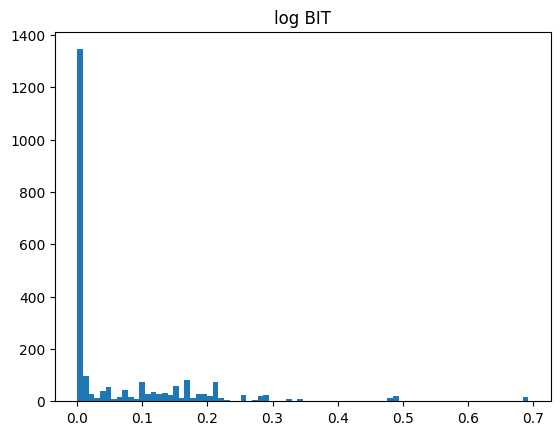

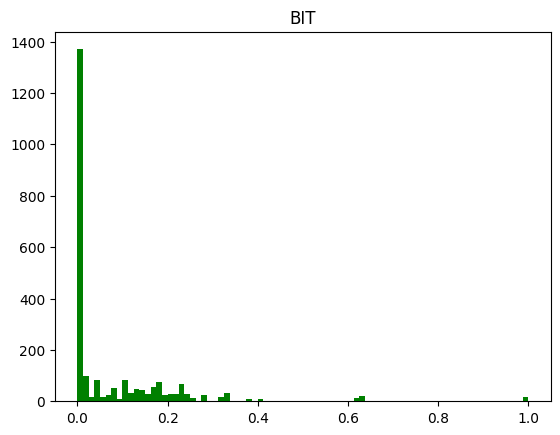

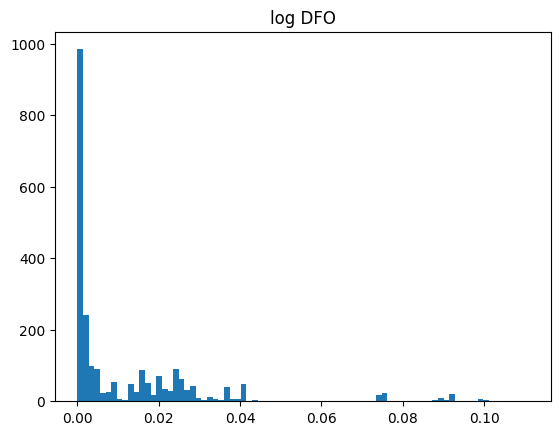

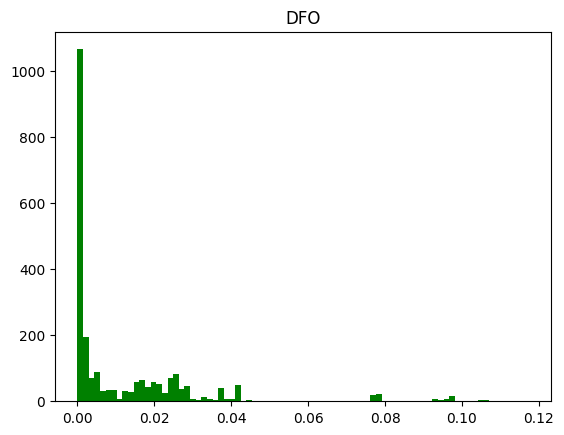

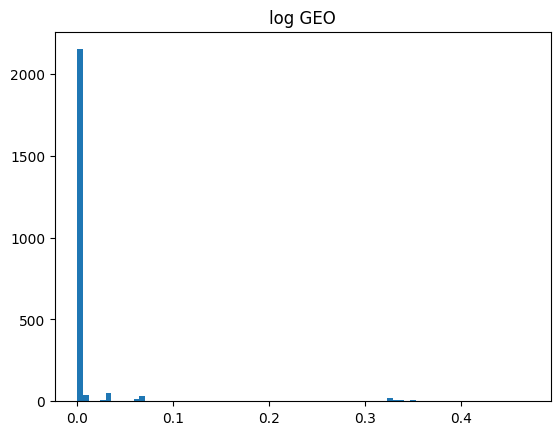

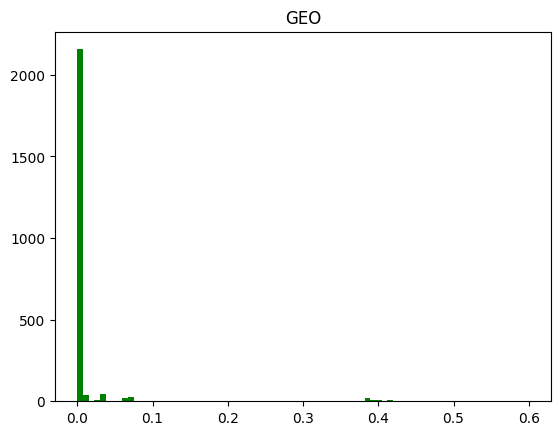

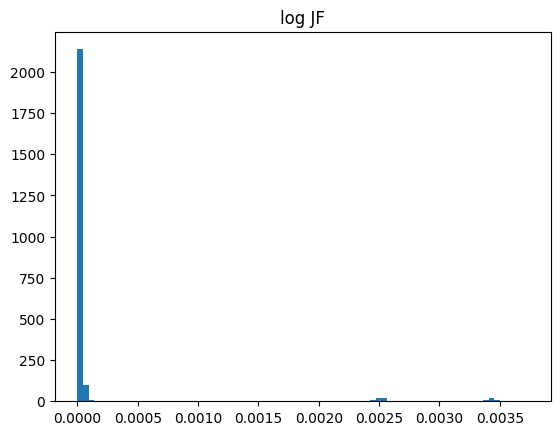

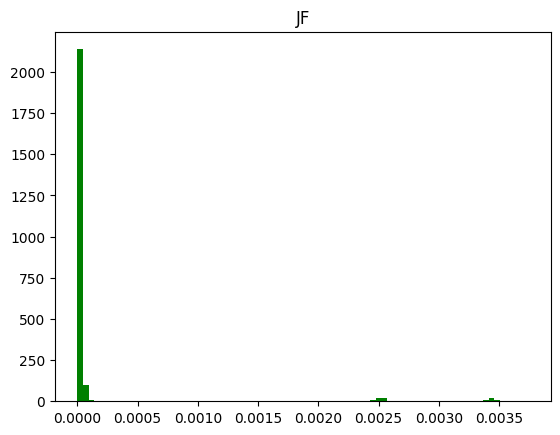

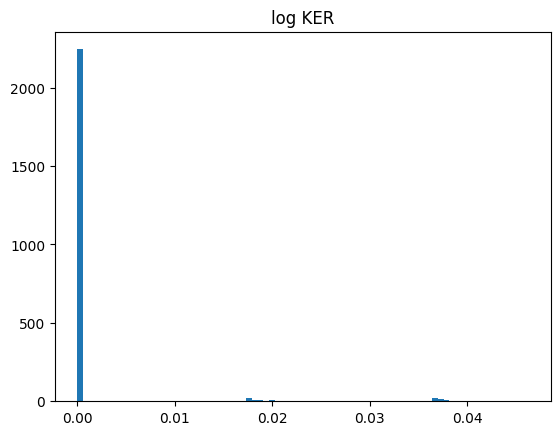

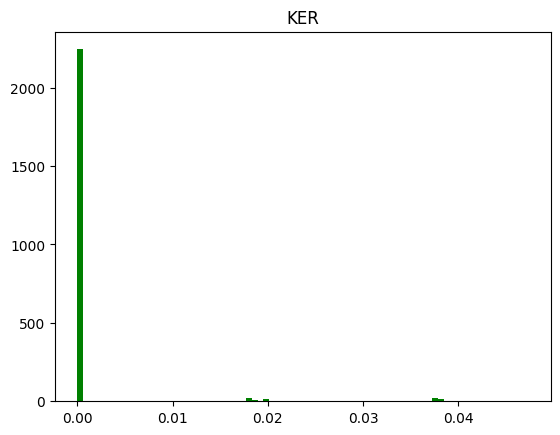

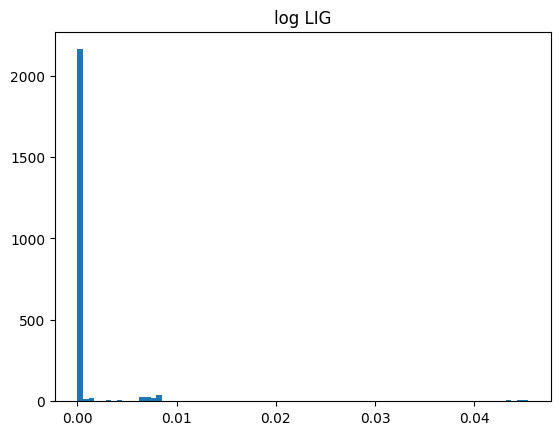

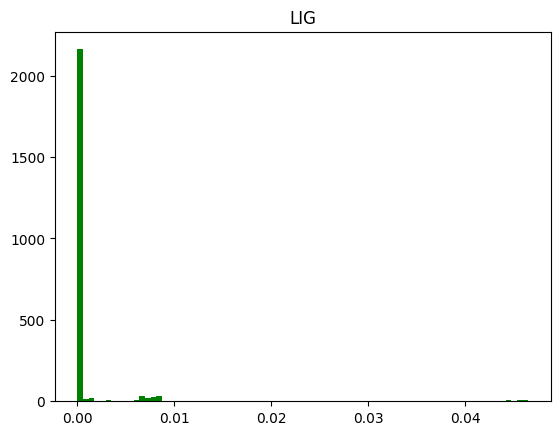

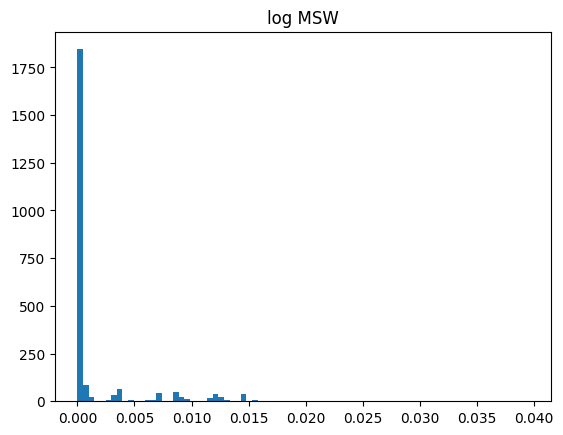

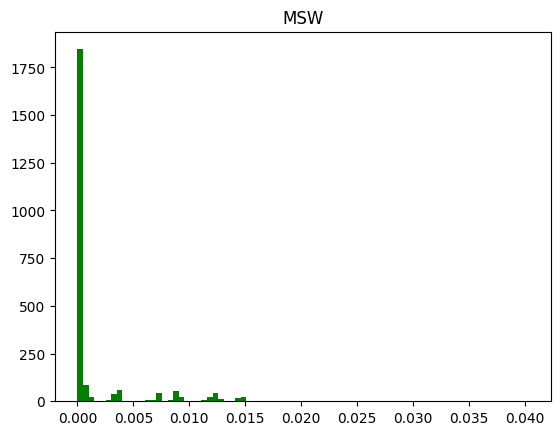

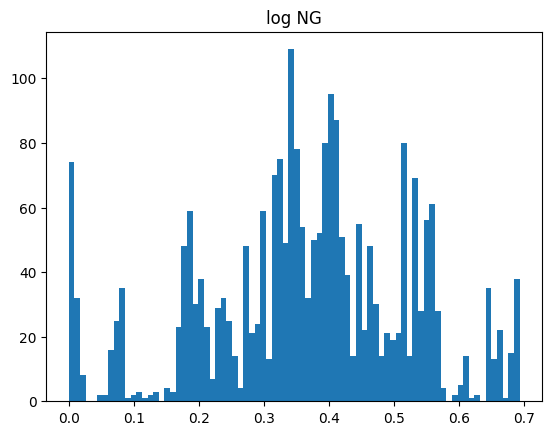

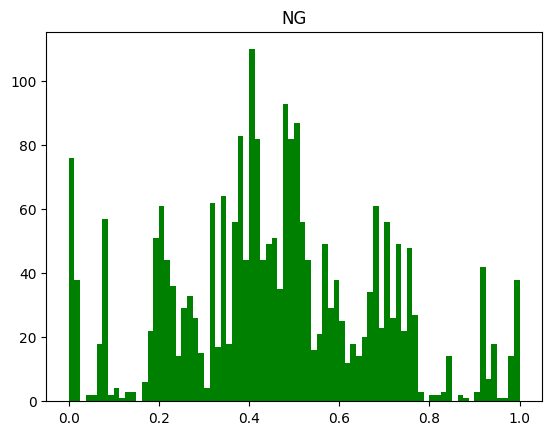

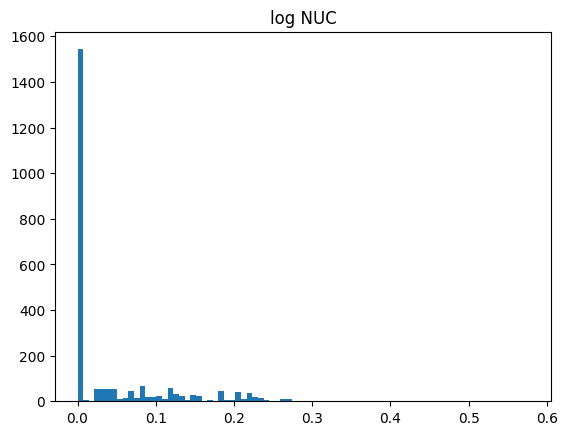

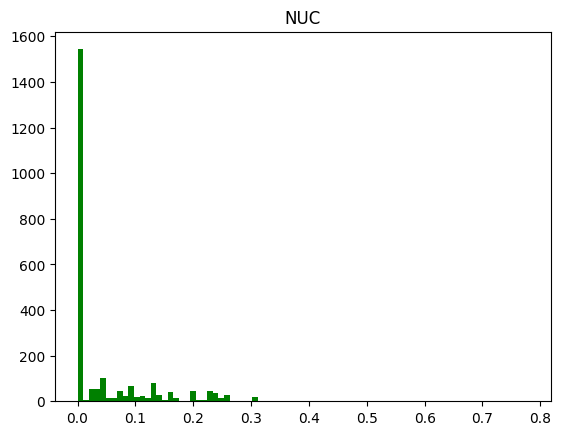

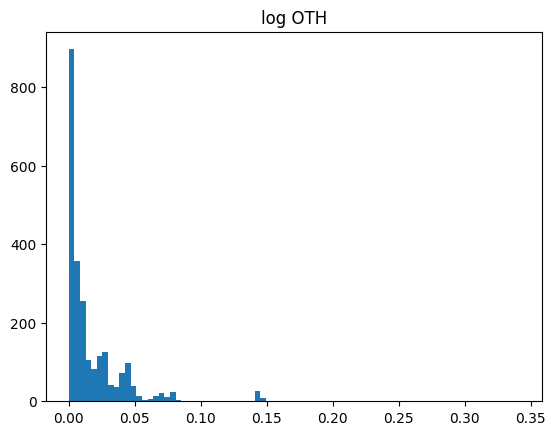

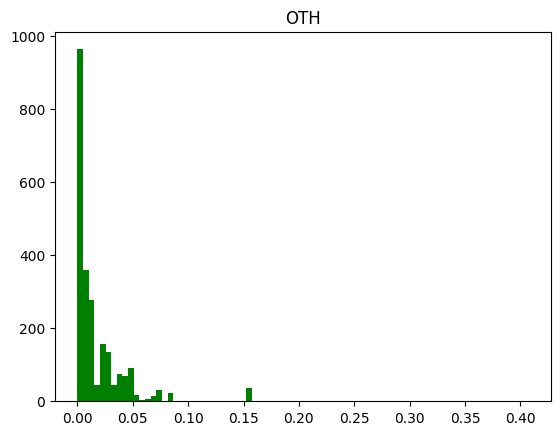

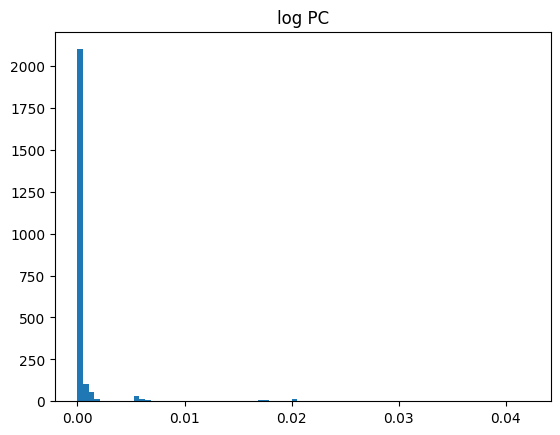

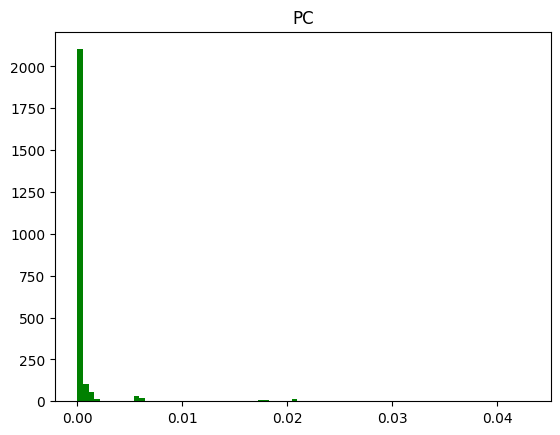

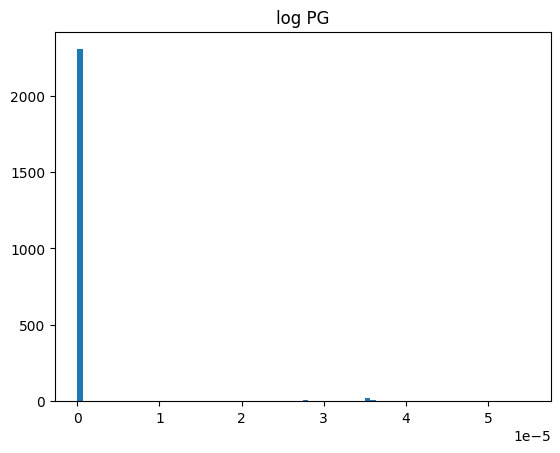

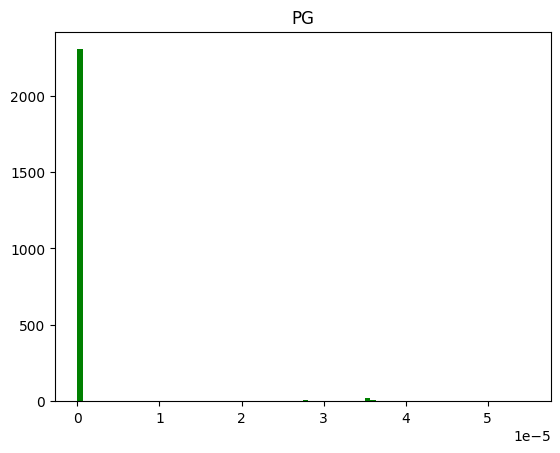

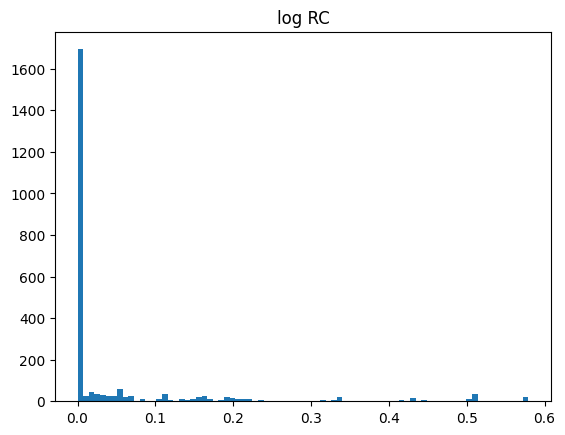

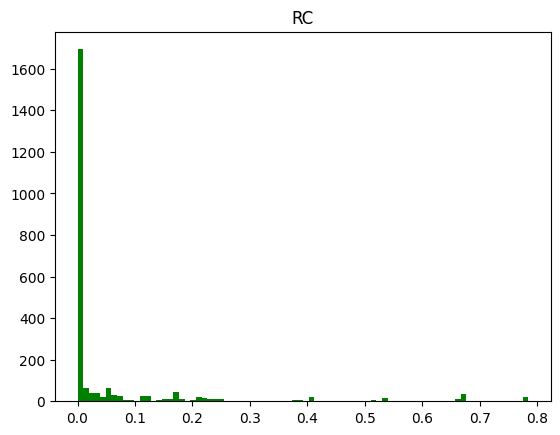

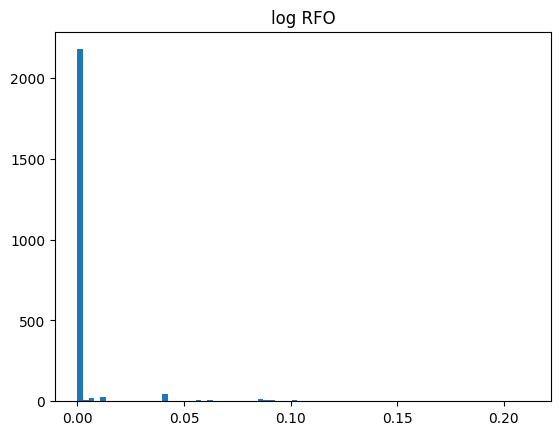

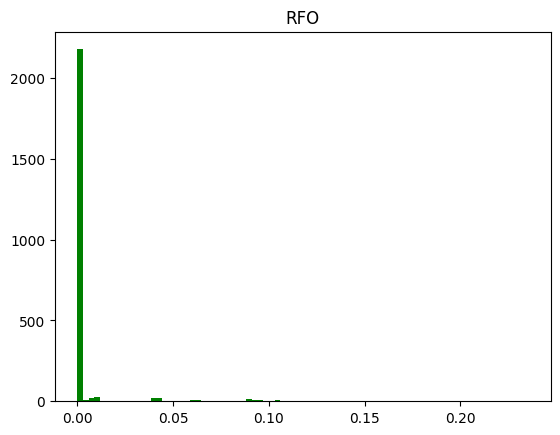

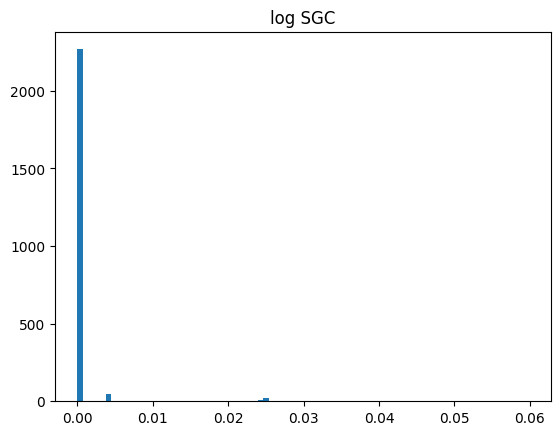

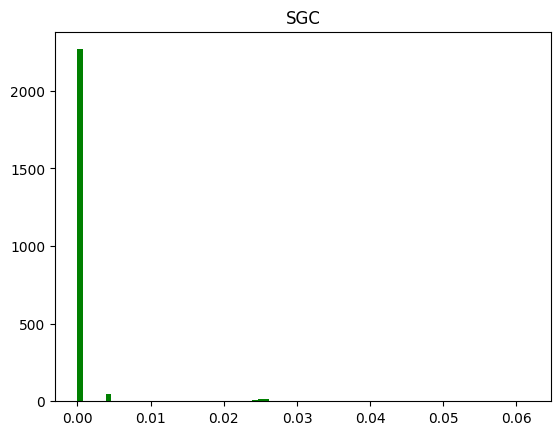

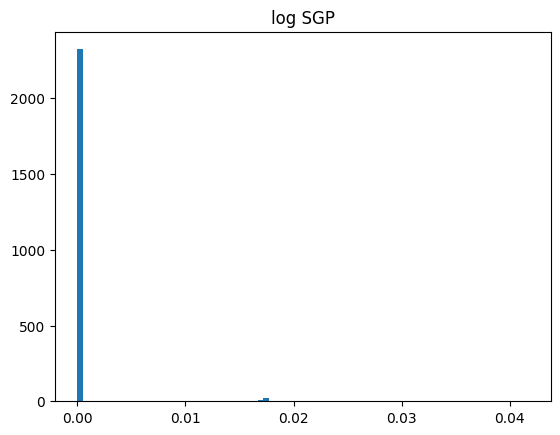

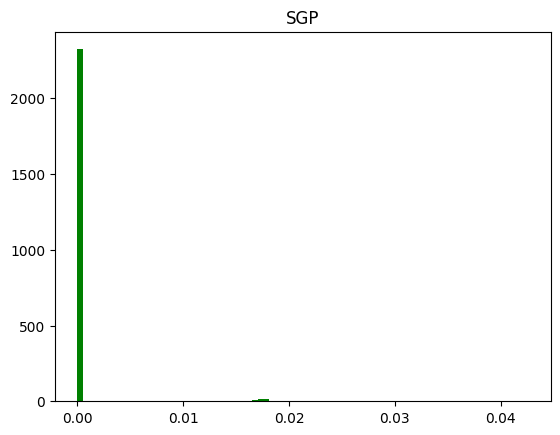

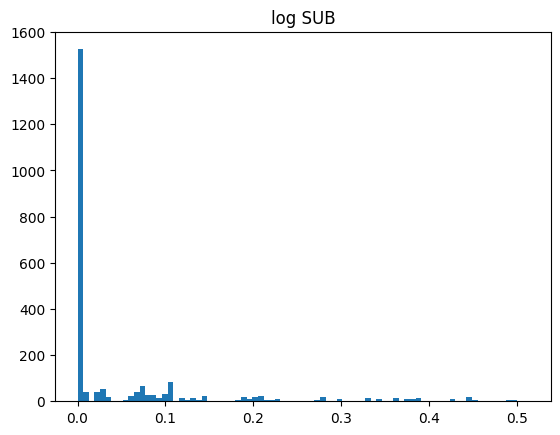

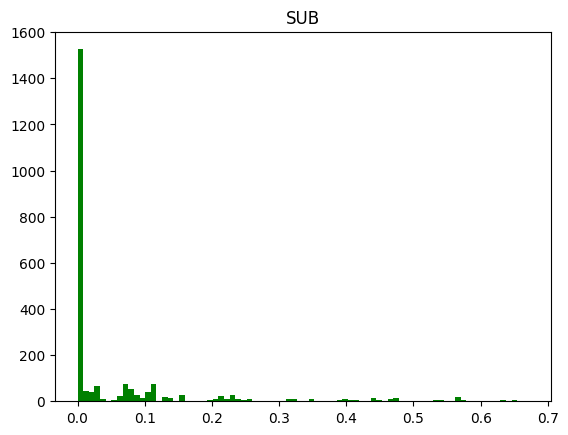

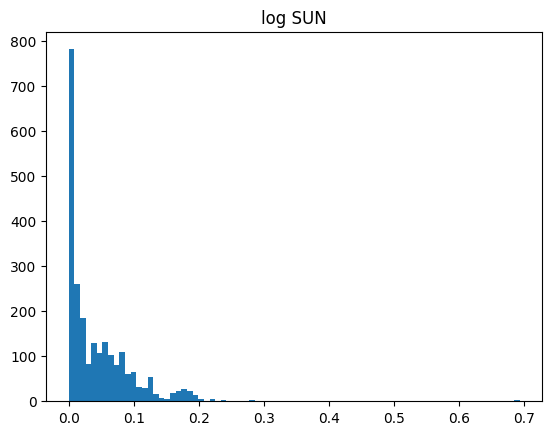

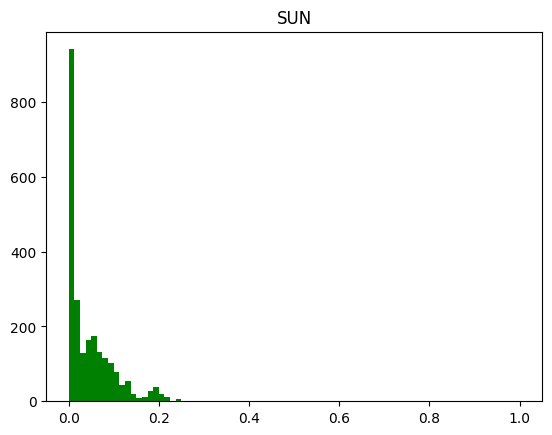

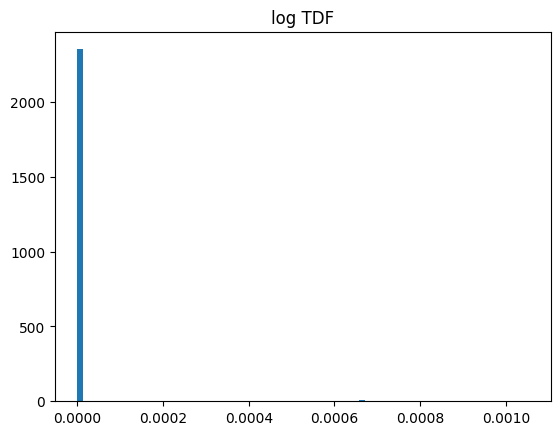

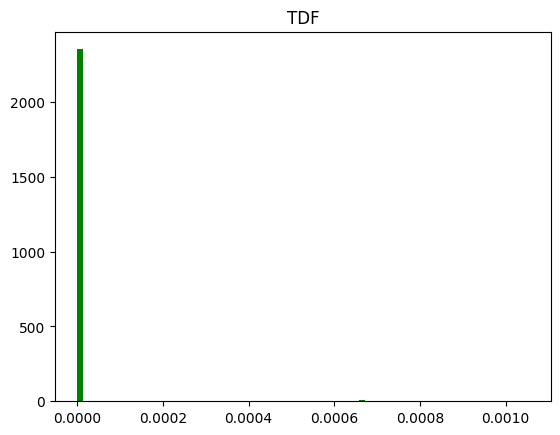

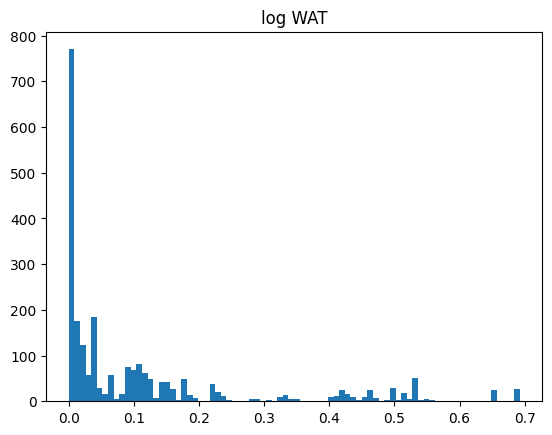

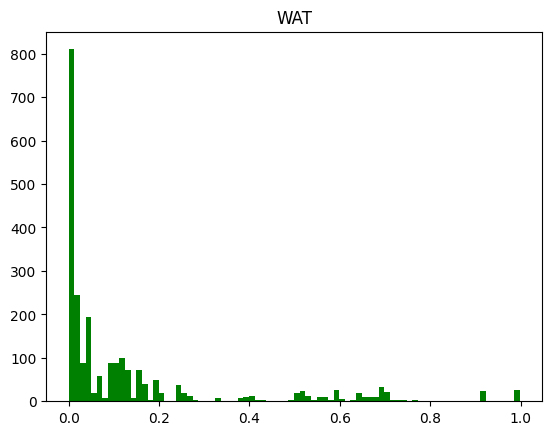

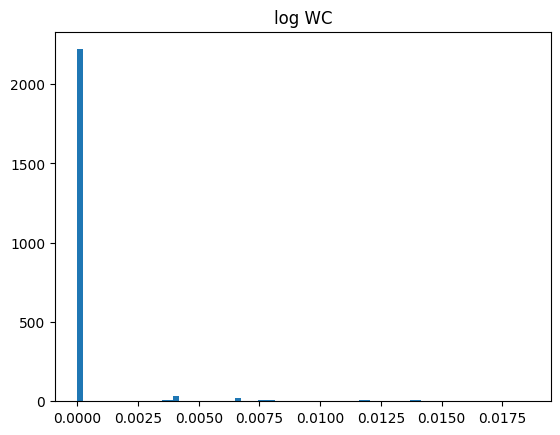

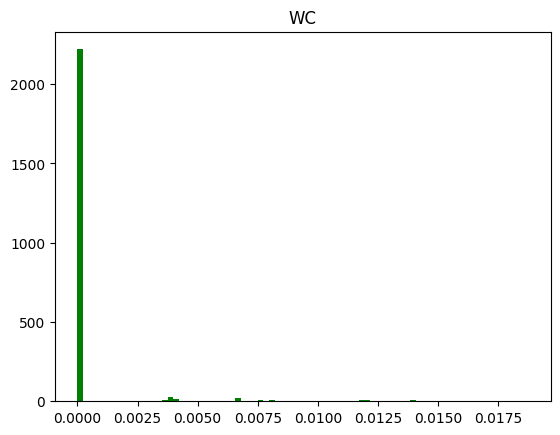

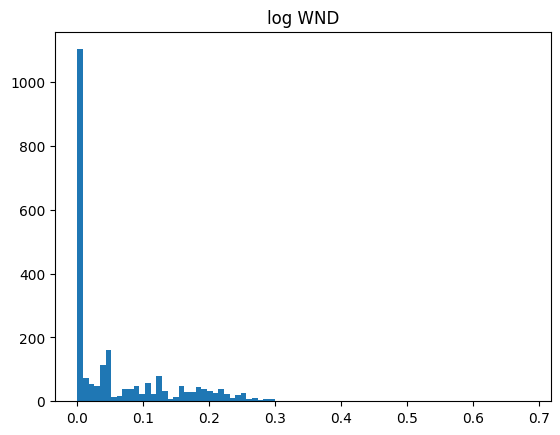

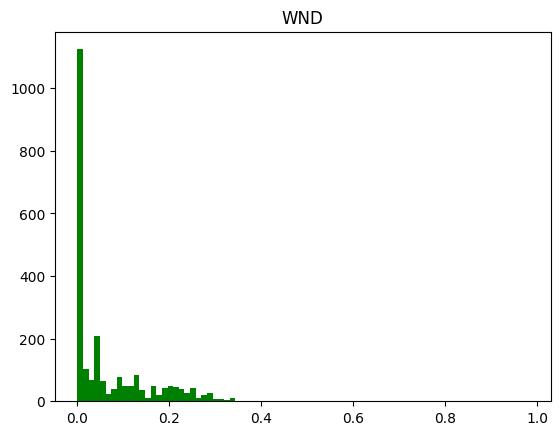

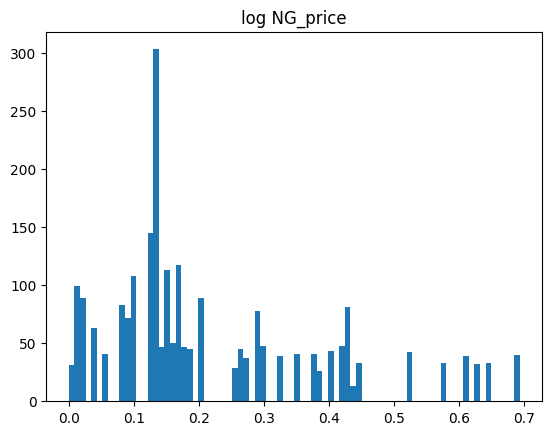

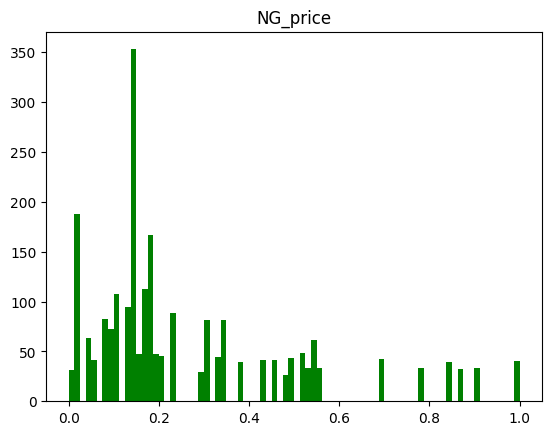

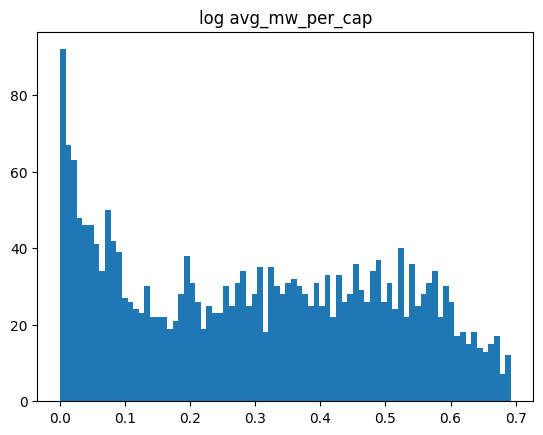

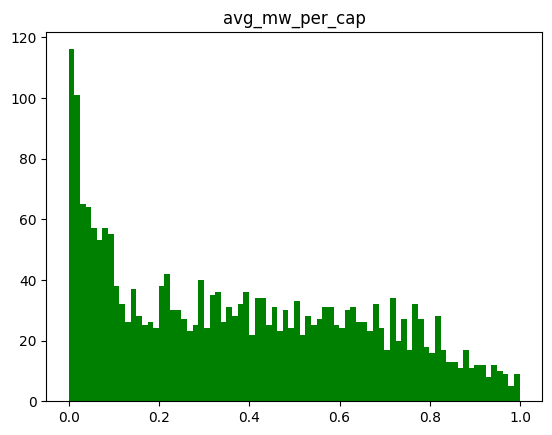

In [51]:
for X_log in X_log_names:
    plt.figure()
    plt.title(f"log {X_log}")
    plt.hist(gen_norm_log[X_log], bins=80)
    plt.figure()
    plt.title(X_log)
    plt.hist(gen_norm[X_log], bins=80, color = 'green')

In [52]:
gen_norm_log.shape

(2363, 40)

In [53]:
from scipy import stats

# list feature names to box cox transform
X_bxcx_names = ['BIT', 'DFO', 'GEO', 'JF', 'KER', 'LIG', 'MSW', 'NG', 'NUC', 'OTH',
       'PC', 'PG', 'RC', 'RFO', 'SGC', 'SGP', 'SUB', 'SUN', 'TDF', 'WAT', 'WC',
       'WND', 'NG_price', 'avg_mw_per_cap']

# copy the dataset. Don't use 'new_df = old_df', as changes will retroactively apply to 'old_df'
gen_norm_bxcx = gen_norm.copy()
gen_norm_bxcx[X_bxcx_names] = gen_norm_bxcx[X_bxcx_names].apply(lambda x: stats.boxcox(1+x)[0])
gen_norm_bxcx.head()

,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,cos_year,sin_6mo,cos_6mo,sin_8mo,cos_8mo,sin_13mo,cos_13mo,NG_price,avg_mw_per_cap,kg_co2_per_mwh
49,AEC,3718,2018-02-01,0.247995,0.704795,0.087693,0.0,0.0,0.0,0.0,...,0.952442,0.580455,0.814292,0.447945,0.894061,0.797102,-0.603845,0.110260,0.351290,390.277157
98,AEC,3784,2018-03-01,0.247995,0.704795,0.087693,0.0,0.0,0.0,0.0,...,0.702913,0.999930,-0.011826,0.927238,0.374474,0.459883,-0.887979,0.111845,0.078189,1100.658028
142,AEC,3850,2018-04-01,0.247995,0.704795,0.087693,0.0,0.0,0.0,0.0,...,0.243730,0.472759,-0.881192,0.914679,-0.404181,-0.014390,-0.999896,0.120282,0.374063,396.081591
193,AEC,3916,2018-05-01,0.247995,0.704795,0.087693,0.0,0.0,0.0,0.0,...,-0.266599,-0.513901,-0.857849,0.371481,-0.928441,-0.471301,-0.881972,0.120282,0.004127,1174.561209
326,AEC,4114,2018-08-01,0.247995,0.704795,0.087693,0.0,0.0,0.0,0.0,...,-0.960587,0.534046,0.845455,-0.912053,0.410073,-0.928348,0.371711,0.131765,0.158852,604.078432


C:\Users\lilye\AppData\Local\Temp\ipykernel_16304\2720411206.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


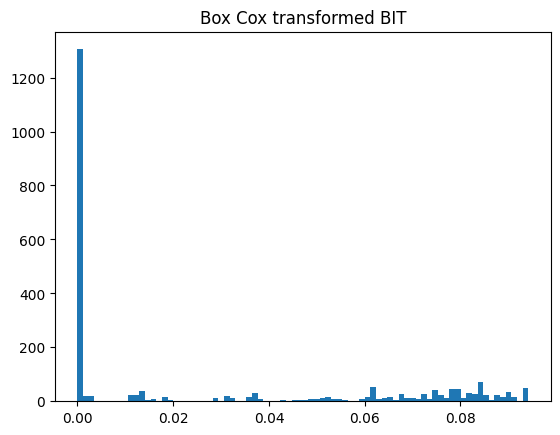

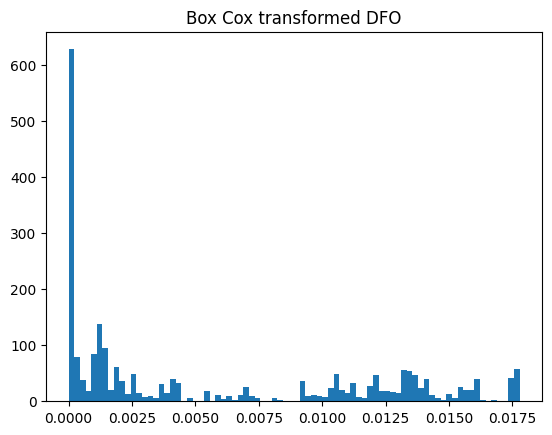

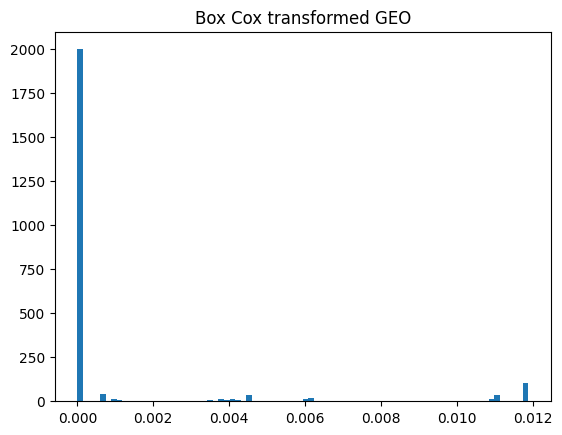

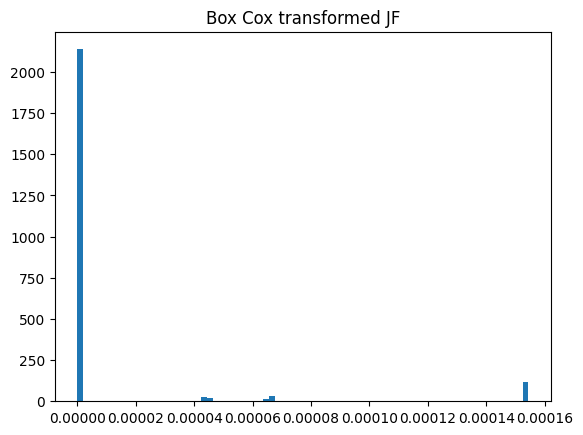

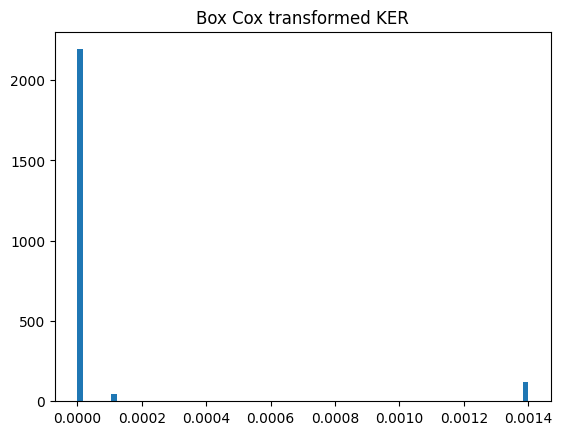

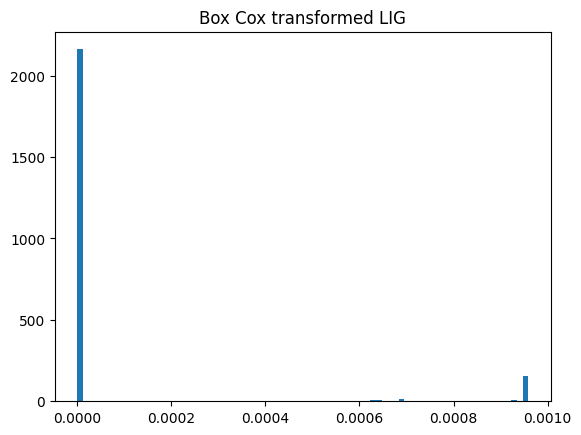

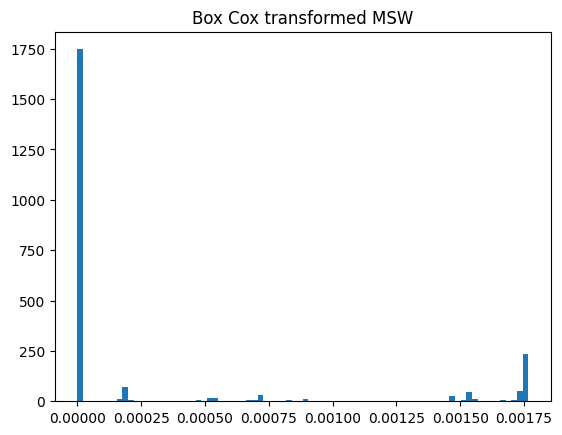

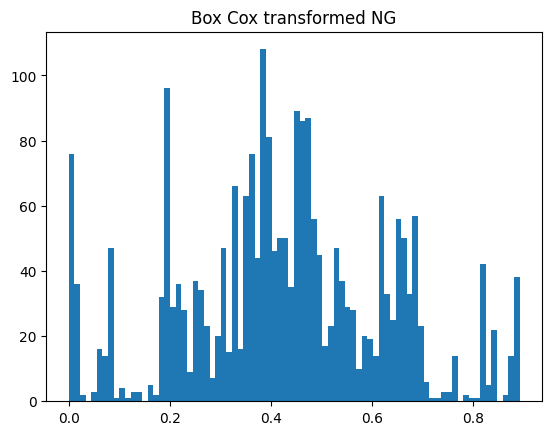

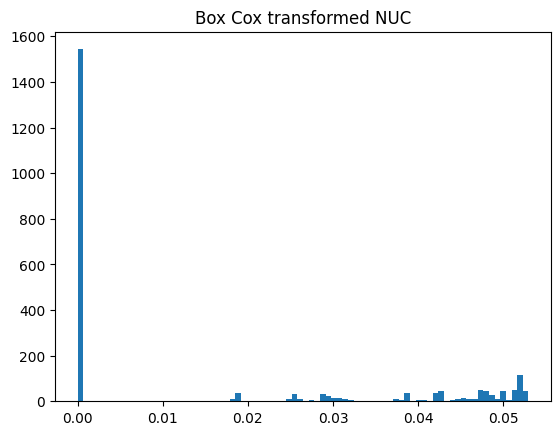

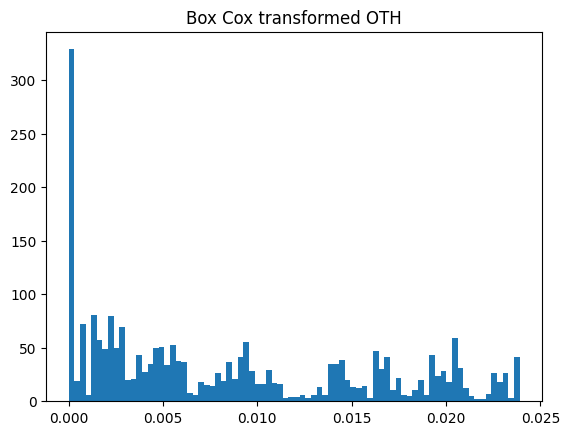

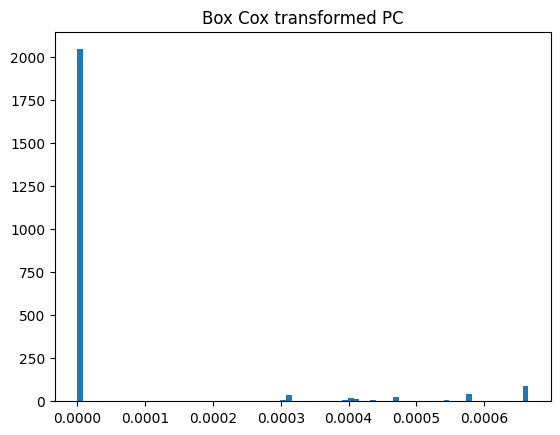

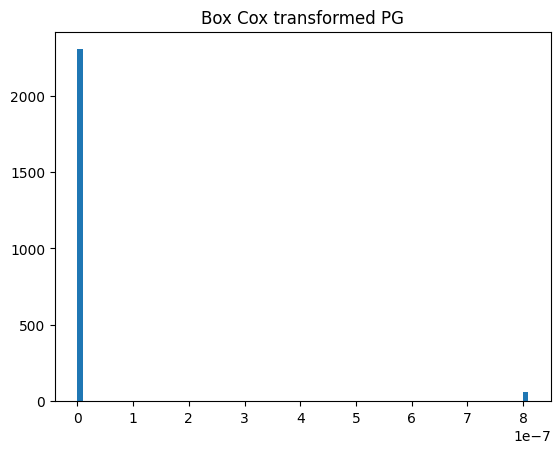

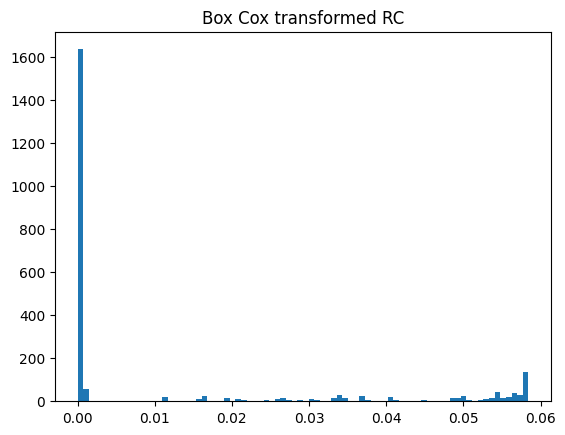

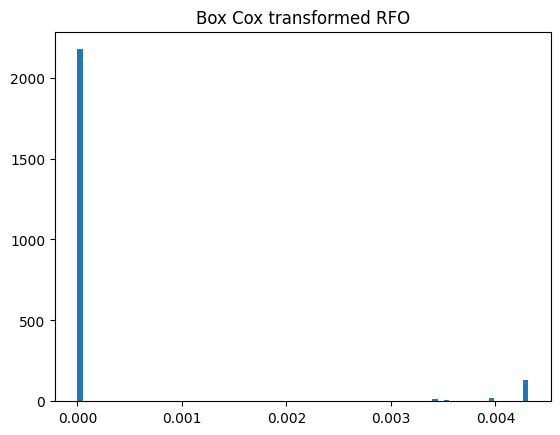

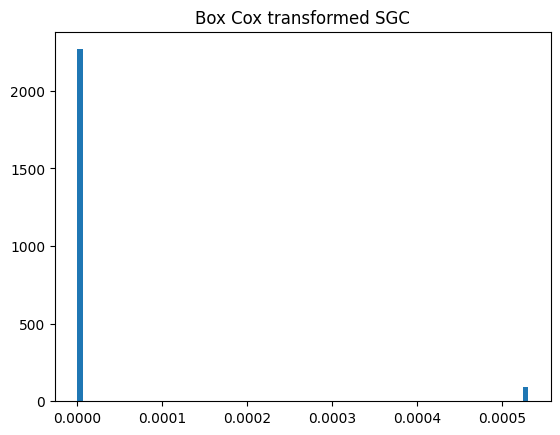

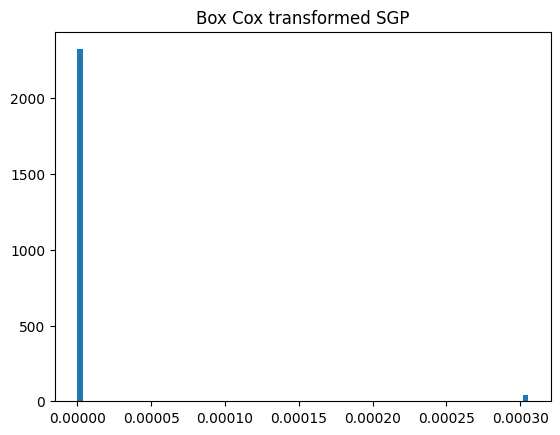

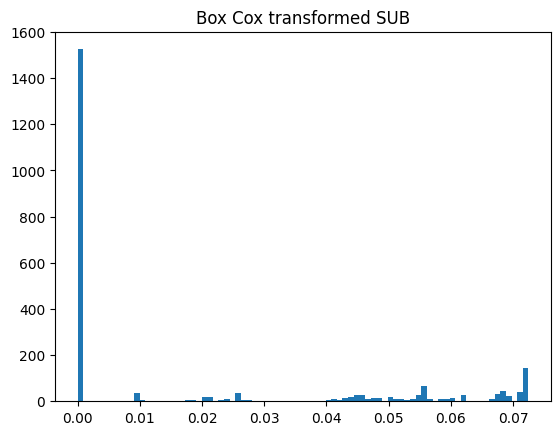

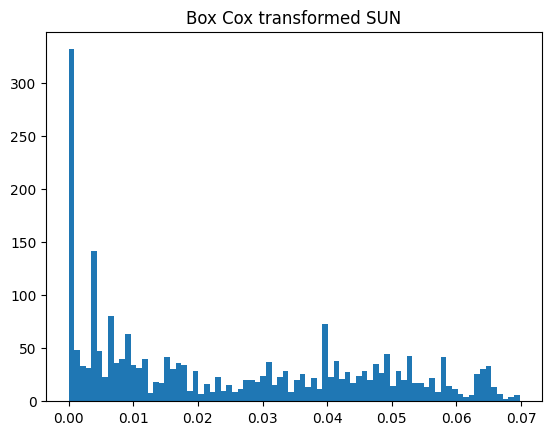

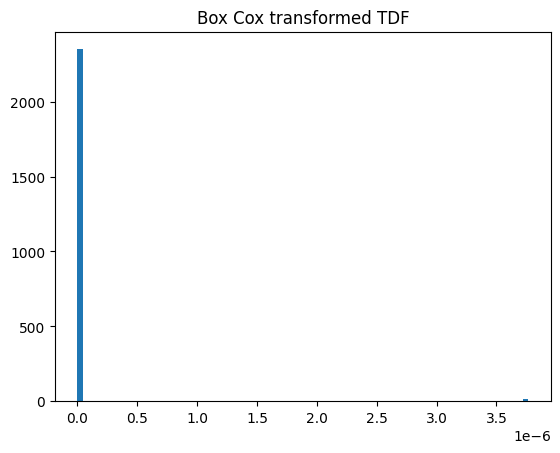

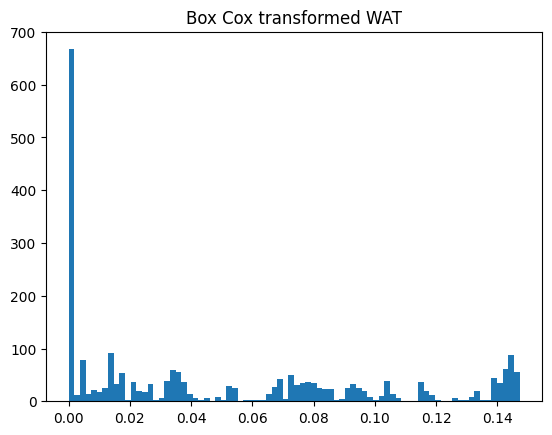

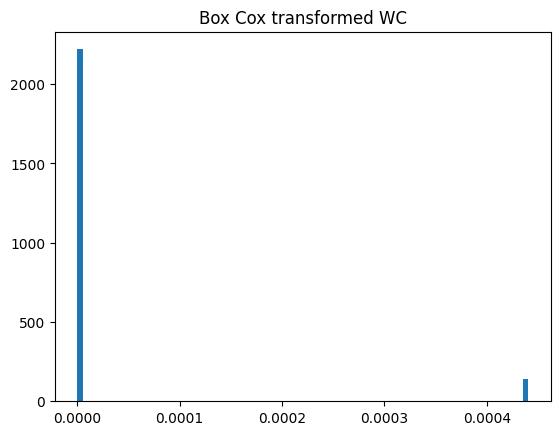

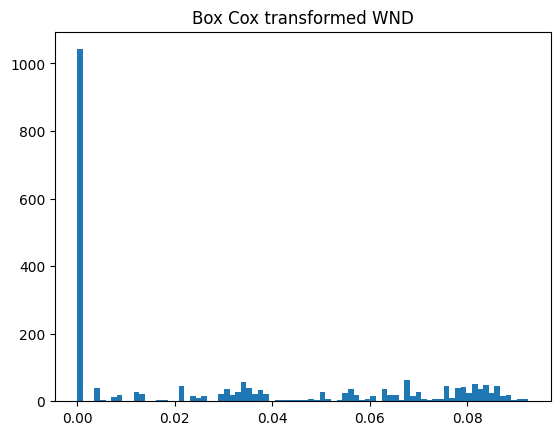

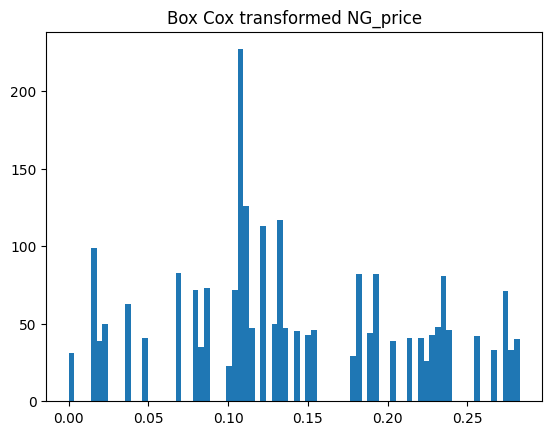

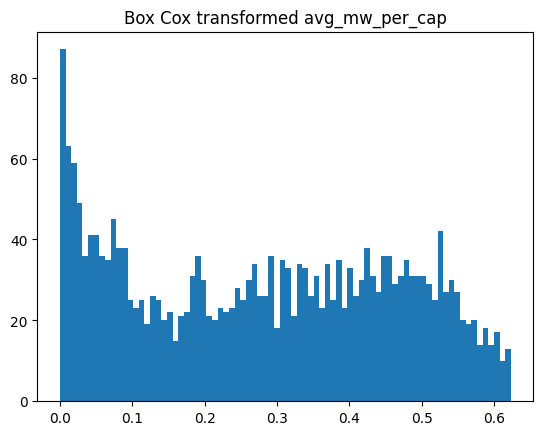

In [54]:
for X_bxcx in X_bxcx_names:
    plt.figure()
    plt.title(f"Box Cox transformed {X_bxcx}")
    plt.hist(gen_norm_bxcx[X_bxcx], bins=80)

In [55]:
# list feature names to sqrt transform
X_sqrt_names = ['BIT', 'DFO', 'GEO', 'JF', 'KER', 'LIG', 'MSW', 'NG', 'NUC', 'OTH',
       'PC', 'PG', 'RC', 'RFO', 'SGC', 'SGP', 'SUB', 'SUN', 'TDF', 'WAT', 'WC',
       'WND', 'NG_price', 'avg_mw_per_cap']

# copy the dataset. Don't use 'new_df = old_df', as changes will retroactively apply to 'old_df'
gen_norm_sqrt = gen_norm.copy()
gen_norm_sqrt[X_sqrt_names] = gen_norm_sqrt[X_sqrt_names].apply(lambda x: x**.5)
gen_norm_sqrt.head()

,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,cos_year,sin_6mo,cos_6mo,sin_8mo,cos_8mo,sin_13mo,cos_13mo,NG_price,avg_mw_per_cap,kg_co2_per_mwh
49,AEC,3718,2018-02-01,0.247995,0.704795,0.534807,0.0,0.0,0.0,0.0,...,0.952442,0.580455,0.814292,0.447945,0.894061,0.797102,-0.603845,0.380587,0.671217,390.277157
98,AEC,3784,2018-03-01,0.247995,0.704795,0.534807,0.0,0.0,0.0,0.0,...,0.702913,0.999930,-0.011826,0.927238,0.374474,0.459883,-0.887979,0.384230,0.286999,1100.658028
142,AEC,3850,2018-04-01,0.247995,0.704795,0.534807,0.0,0.0,0.0,0.0,...,0.243730,0.472759,-0.881192,0.914679,-0.404181,-0.014390,-0.999896,0.403674,0.698736,396.081591
193,AEC,3916,2018-05-01,0.247995,0.704795,0.534807,0.0,0.0,0.0,0.0,...,-0.266599,-0.513901,-0.857849,0.371481,-0.928441,-0.471301,-0.881972,0.403674,0.064325,1174.561209
326,AEC,4114,2018-08-01,0.247995,0.704795,0.534807,0.0,0.0,0.0,0.0,...,-0.960587,0.534046,0.845455,-0.912053,0.410073,-0.928348,0.371711,0.430391,0.420613,604.078432


Correlation Matrices

<Axes: >

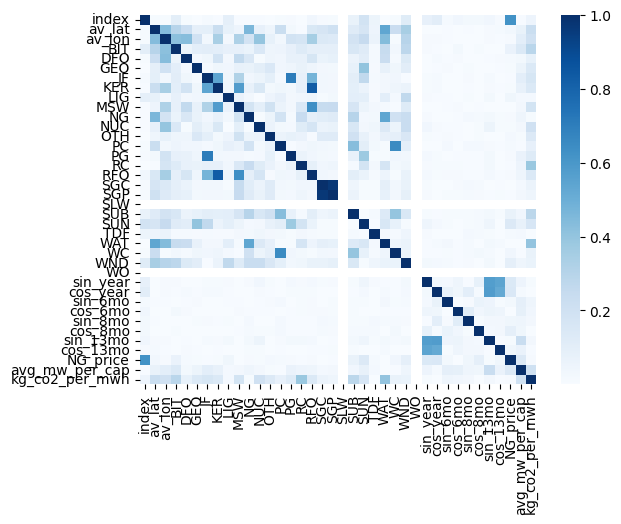

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
    
sns.heatmap(data=abs(gen_norm.corr(numeric_only=True)), cmap='Blues', xticklabels=True, yticklabels=True)

<Axes: >

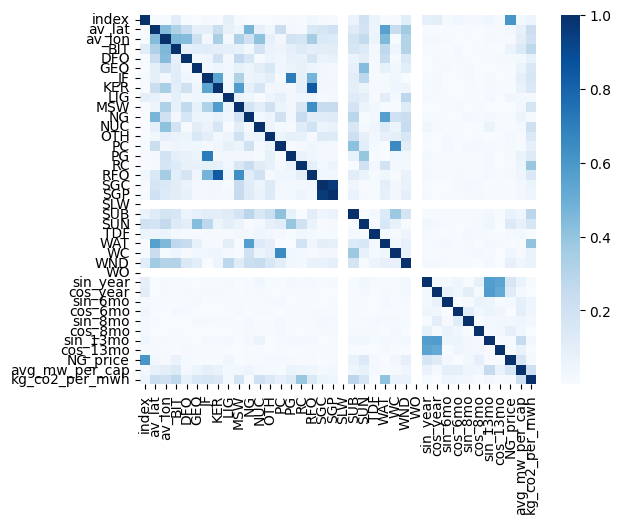

In [57]:
sns.heatmap(data=abs(gen_norm_log.corr(numeric_only=True)), cmap='Blues', xticklabels=True, yticklabels=True)

<Axes: >

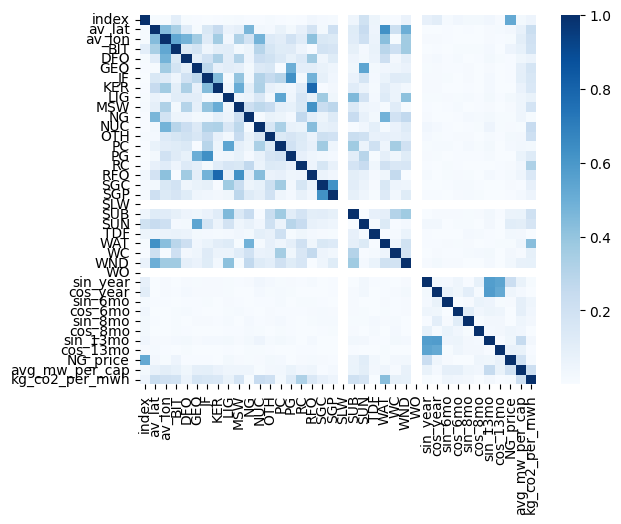

In [58]:
sns.heatmap(data=abs(gen_norm_bxcx.corr(numeric_only=True)), cmap='Blues', xticklabels=True, yticklabels=True)

<Axes: >

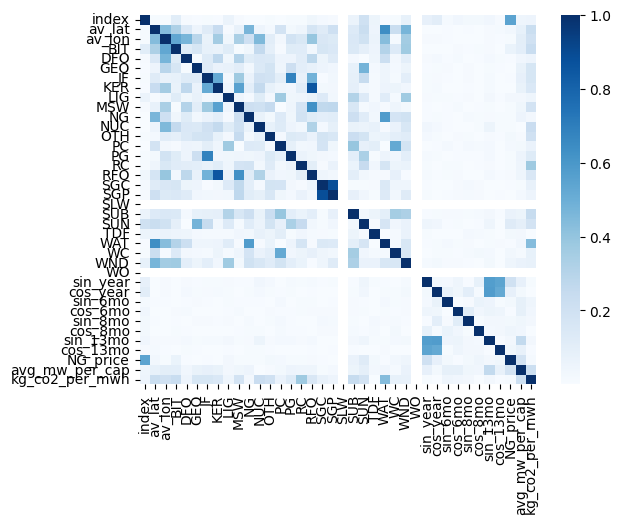

In [59]:
sns.heatmap(data=abs(gen_norm_sqrt.corr(numeric_only=True)), cmap='Blues', xticklabels=True, yticklabels=True)

### Multiple Linear Regression
 * Response variable is CO2 Intensity (kg CO2 per MW-hr generated)
 * Explanatory variables are selected features in the following categories: generator configuration (installed capacity by fuel source), specific power, location (geographical average for BA), seasonality

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
# split
def split(dataset, feature_names, response_name):
    x_train, x_test, y_train, y_test = train_test_split(
        dataset[feature_names], dataset[response_name], test_size=0.33, random_state=347)
    return x_train, x_test, y_train, y_test

In [62]:
# train
def trainLinear(x_train, y_train):
    linearModel = LinearRegression()
    linearModel.fit(x_train, y_train)
    return linearModel

In [63]:
# test
# send test set independent variables to model
def testLinear(linearModel, x_test, y_test, feature_names):
    y_pred = linearModel.predict(x_test)
    # evaluate how well model outputs predict test set response variable
    mse = mean_squared_error(y_test, y_pred)
    r_sq = r2_score(y_test, y_pred)
    coeffs_dict = {}
    for x in range(0,len(feature_names)):
        coeffs_dict[feature_names[x]] = linearModel.coef_[x]
    intercept = linearModel.intercept_
    test_R_sq = r_sq
    return coeffs_dict, intercept, test_R_sq
   

In [64]:
gen_norm.columns

Index(['ba_code', 'index', 'period', 'av_lat', 'av_lon', 'BIT', 'DFO', 'GEO',
       'JF', 'KER', 'LIG', 'MSW', 'NG', 'NUC', 'OTH', 'PC', 'PG', 'RC', 'RFO',
       'SGC', 'SGP', 'SLW', 'SUB', 'SUN', 'TDF', 'WAT', 'WC', 'WND', 'WO',
       'sin_year', 'cos_year', 'sin_6mo', 'cos_6mo', 'sin_8mo', 'cos_8mo',
       'sin_13mo', 'cos_13mo', 'NG_price', 'avg_mw_per_cap', 'kg_co2_per_mwh'],
      dtype='object')

In [65]:
# function that performs split, train, and test; returns linear regression model
def linearTrainTest(dataset, X_names, y_name):
    X_train, X_test, y_train, y_test = split(dataset, X_names, y_name)
    lin_mod = trainLinear(X_train, y_train)
    coeffs, intcp, r2 = testLinear(lin_mod, X_test, y_test, X_names)
    print(f"coeffs:  {coeffs}")
    print(f"intercept:  {intcp}")
    print(f"train R squared:  {lin_mod.score(X_train, y_train)}")
    print(f"test R squared:  {r2}\n")
    return lin_mod

Select feature names manually, train and test models

In [115]:
X_names = [ 'NG', 'WND', 'WAT', 'NUC', 'BIT', 'SUB', 'RC', 'SUN', 'DFO', 'OTH', 'RFO', 'GEO'
       #, 'JF', 'KER', 'LIG', 'MSW', 'PC', 'PG',   'SGC', 'SGP',   'TDF',  'WC' 
       , 'sin_year', 'cos_year', 'sin_6mo', 'cos_6mo', 'sin_8mo', 'cos_8mo'
       , 'sin_13mo', 'cos_13mo', 'NG_price'
       , 'av_lat', 'av_lon' 
       , 'avg_mw_per_cap'
       ]
print('baseline:')
lmod_n = linearTrainTest(gen_norm, X_names, 'kg_co2_per_mwh')
print('log transforms:')
lmod_n_log = linearTrainTest(gen_norm_log, X_names, 'kg_co2_per_mwh')
print('box cox transforms:')
lmod_n_bxcx = linearTrainTest(gen_norm_bxcx, X_names, 'kg_co2_per_mwh')
print('sqrt transforms:')
lmod_n_sqrt = linearTrainTest(gen_norm_sqrt, X_names, 'kg_co2_per_mwh')

baseline:
coeffs:  {'NG': 84.24761644257349, 'WND': -54.53112294225827, 'WAT': -263.2820761743535, 'NUC': -624.4362114539069, 'BIT': 654.8468488460171, 'SUB': 632.0878965240516, 'RC': 693.1302740753027, 'SUN': -337.12029666785867, 'DFO': 183.4883125263497, 'OTH': -465.14328390724535, 'RFO': -56.17701946001057, 'GEO': -302.315393849136, 'sin_year': -6.476466493866567, 'cos_year': -2.777099261269137, 'sin_6mo': -17.932823992571954, 'cos_6mo': 19.985052361853977, 'sin_8mo': -8.775248500018678, 'cos_8mo': 0.30758296937728136, 'sin_13mo': -4.060978421735284, 'cos_13mo': 6.6682712144544665, 'NG_price': 40.530169153792215, 'av_lat': -78.73233964729911, 'av_lon': -55.029365087259194, 'avg_mw_per_cap': 163.13822010464062}
intercept:  299.8668325652171
train R squared:  0.5218195943452106
test R squared:  0.5026691746252774

log transforms:
coeffs:  {'NG': -346.1529831696487, 'WND': -450.872555993042, 'WAT': -803.2350019649346, 'NUC': -1069.3945788097365, 'BIT': 422.9637808669954, 'SUB': 365.891

Plot residuals for model prediction vs observed values (entire data set)

In [68]:
gen_norm_check = gen_norm.copy()
gen_norm_check['predicted_kco2pmwh'] = lmod_n.predict(gen_norm_check[X_names])


<Axes: xlabel='kg_co2_per_mwh', ylabel='predicted_kco2pmwh'>

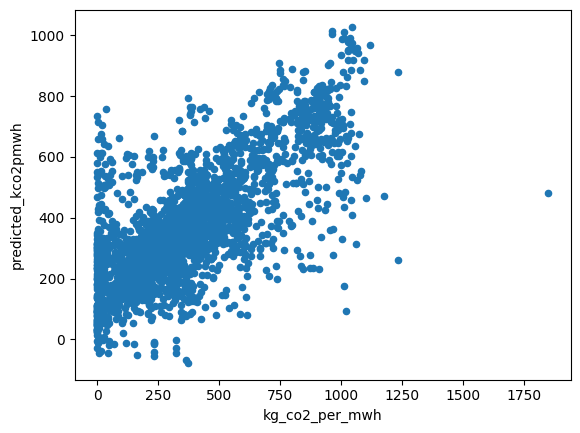

In [69]:
gen_norm_check.plot.scatter(x='kg_co2_per_mwh', y='predicted_kco2pmwh')

In [70]:
gen_norm_log_check = gen_norm_log.copy()
gen_norm_log_check['predicted_kco2pmwh'] = lmod_n_log.predict(gen_norm_log_check[X_names])

<Axes: xlabel='kg_co2_per_mwh', ylabel='predicted_kco2pmwh'>

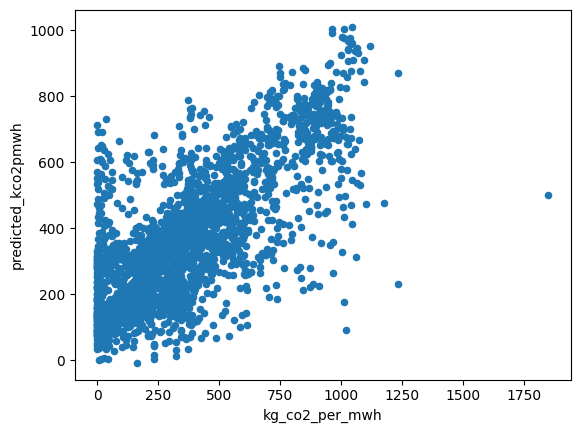

In [71]:
gen_norm_log_check.plot.scatter(x='kg_co2_per_mwh', y='predicted_kco2pmwh')

In [72]:
gen_norm_bxcx_check = gen_norm_bxcx.copy()
gen_norm_bxcx_check['predicted_kco2pmwh'] = lmod_n_bxcx.predict(gen_norm_bxcx_check[X_names])

<Axes: xlabel='kg_co2_per_mwh', ylabel='predicted_kco2pmwh'>

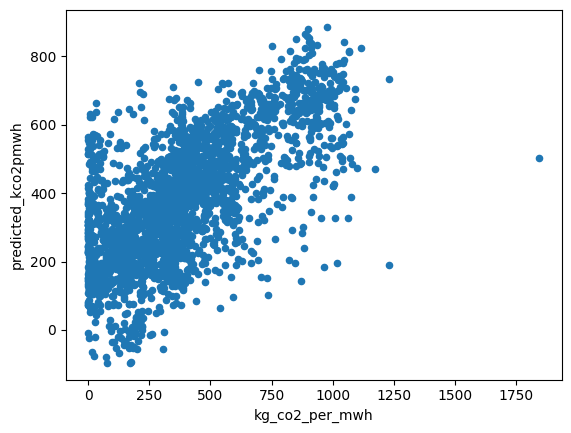

In [73]:
gen_norm_bxcx_check.plot.scatter(x='kg_co2_per_mwh', y='predicted_kco2pmwh')

In [74]:
gen_norm_sqrt_check = gen_norm_sqrt.copy()
gen_norm_sqrt_check['predicted_kco2pmwh'] = lmod_n_sqrt.predict(gen_norm_sqrt_check[X_names])

<Axes: xlabel='kg_co2_per_mwh', ylabel='predicted_kco2pmwh'>

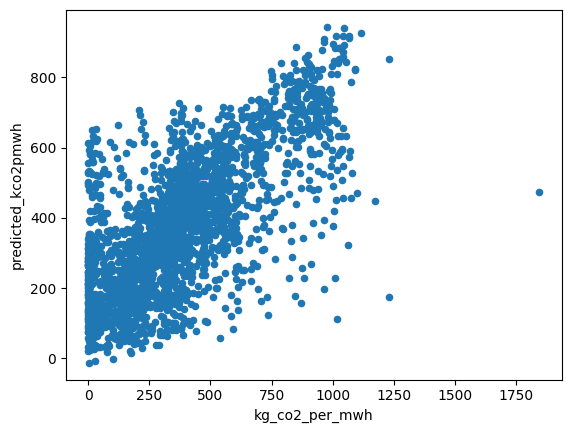

In [75]:
gen_norm_sqrt_check.plot.scatter(x='kg_co2_per_mwh', y='predicted_kco2pmwh')

<Axes: xlabel='kg_co2_per_mwh', ylabel='predicted_kco2pmwh'>

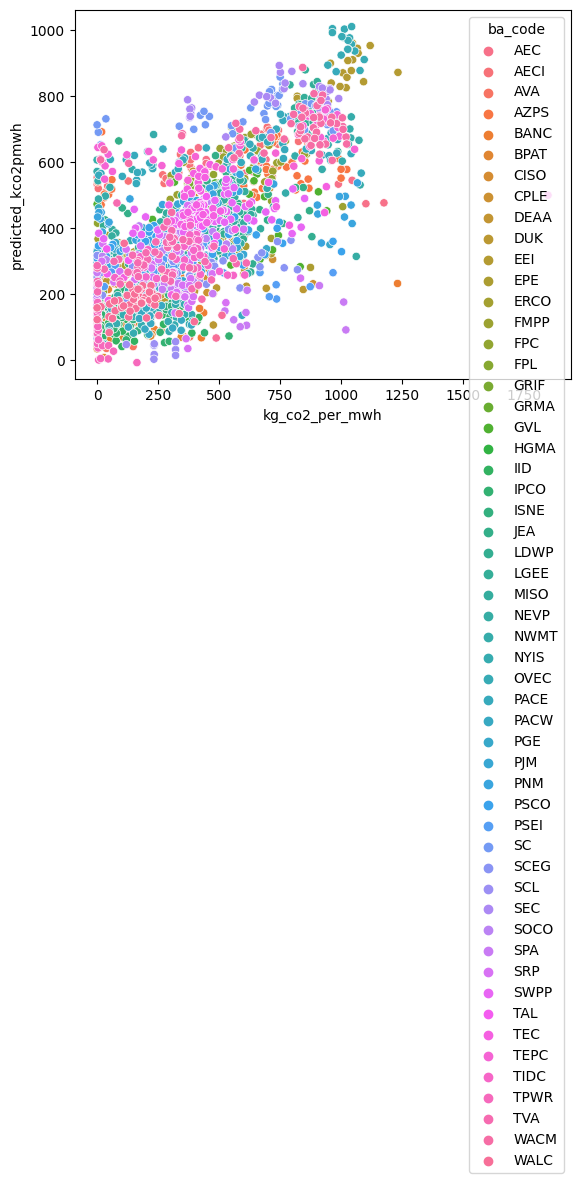

In [76]:
# check visually for potential clustering by BA
sns.scatterplot(data=gen_norm_log_check, x='kg_co2_per_mwh', y='predicted_kco2pmwh', hue='ba_code')

In [77]:
# add features
# use SelectKBest and f_regression from scikit-learn to optimize features?

# tune using grid search on k?
# https://machinelearningmastery.com/feature-selection-for-regression-data/

#Ridge regression has built-in cross validation

#random forest regression


In [78]:
from sklearn.ensemble import RandomForestRegressor

X = gen_norm[X_names]
y = gen_norm['kg_co2_per_mwh']

rfr_base = RandomForestRegressor(n_estimators = 100, max_depth=2, min_samples_split=2, random_state=1)

rfr_base.fit(X, y)


RandomForestRegressor(max_depth=2, random_state=1)

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(rfr_base.estimators_[0], feature_names=X_names, filled=True, rounded=True)
graph = graphviz.Source(dot_data, format='png')
graph.render('tree')

In [81]:
gen_norm_check = gen_norm.copy()
gen_norm_check['predicted_kco2pmwh'] = rfr_base.predict(gen_norm_check[X_names])

<Axes: xlabel='kg_co2_per_mwh', ylabel='predicted_kco2pmwh'>

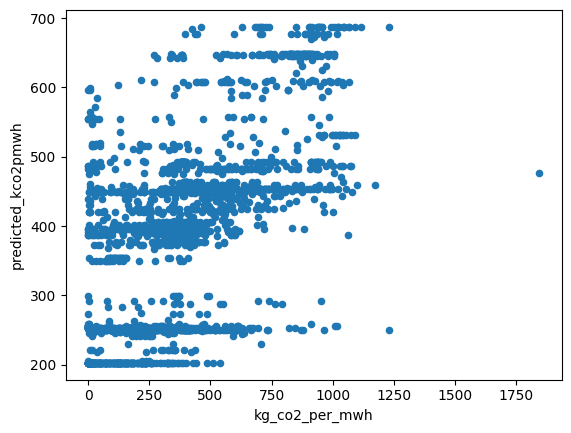

In [82]:
gen_norm_check.plot.scatter(x='kg_co2_per_mwh', y='predicted_kco2pmwh')

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=2, shuffle=True)

rfr = RandomForestRegressor()

rs = RandomizedSearchCV(rfr, n_iter=10, param_distributions={'max_depth': range(1,15), 'min_samples_split':range(2,50)} \
                        , cv=5, n_jobs=-1, random_state=3, scoring='r2')
rs.fit(X_train, y_train)

print(f"rs best params:  {rs.best_params_}")
print(f"rs best score  {rs.best_score_}")


rs best params:  {'min_samples_split': 13, 'max_depth': 12}
rs best score  0.615001190981065


In [89]:
rfr_tuned = RandomForestRegressor(n_estimators = 100, max_depth=12, min_samples_split=13, random_state=1)

rfr_tuned.fit(X, y)

RandomForestRegressor(max_depth=12, min_samples_split=13, random_state=1)

In [90]:
gen_norm_check = gen_norm.copy()
gen_norm_check['predicted_kco2pmwh'] = rfr_tuned.predict(gen_norm_check[X_names])

<Axes: xlabel='kg_co2_per_mwh', ylabel='predicted_kco2pmwh'>

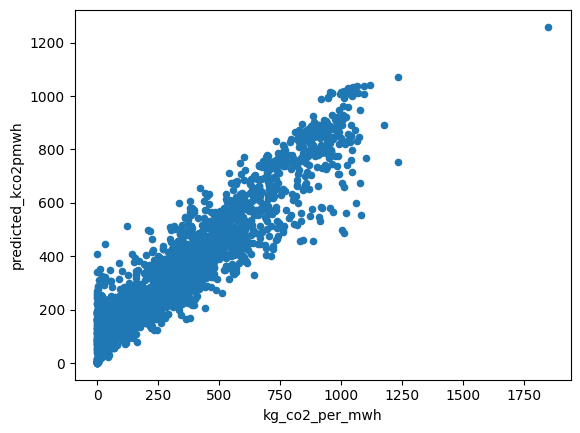

In [91]:
gen_norm_check.plot.scatter(x='kg_co2_per_mwh', y='predicted_kco2pmwh')

In [116]:
gen_snap = gen_norm[(gen_norm.period >= '2021-01-01') & (gen_norm.period <= '2021-12-01')]
gen_snap.head()

,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,cos_year,sin_6mo,cos_6mo,sin_8mo,cos_8mo,sin_13mo,cos_13mo,NG_price,avg_mw_per_cap,kg_co2_per_mwh
1797,AEC,6016,2021-01-01,0.247995,0.704795,0.0,0.0,0.0,0.0,0.0,...,0.976043,-0.424728,0.905321,0.323093,-0.946367,0.277185,0.960817,0.150418,0.699609,393.510419
1853,AEC,6080,2021-02-01,0.247995,0.704795,0.0,0.0,0.0,0.0,0.0,...,0.951123,0.587437,0.809270,-0.453703,-0.891153,0.698369,0.715738,0.518106,0.066842,553.020546
1910,AEC,6144,2021-03-01,0.247995,0.704795,0.0,0.0,0.0,0.0,0.0,...,0.699848,0.999791,-0.020426,-0.929634,-0.368484,0.938318,0.345774,0.137883,0.708129,389.562351
1965,AEC,6208,2021-04-01,0.247995,0.704795,0.0,0.0,0.0,0.0,0.0,...,0.239557,0.465162,-0.885225,-0.912053,0.410073,0.990329,-0.138742,0.143454,0.429212,398.767406
2018,AEC,6270,2021-05-01,0.247995,0.704795,0.0,0.0,0.0,0.0,0.0,...,-0.270742,-0.521260,-0.853398,-0.365484,0.930818,0.816447,-0.577420,0.178273,0.815923,404.574278


In [117]:
gen_snap.tail()

,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,cos_year,sin_6mo,cos_6mo,sin_8mo,cos_8mo,sin_13mo,cos_13mo,NG_price,avg_mw_per_cap,kg_co2_per_mwh
2178,WALC,6458,2021-07-01,0.45081,0.144606,0.0,0.000649,0.0,0.0,0.0,...,-0.969581,-0.474653,0.880173,0.931992,0.362480,-0.013398,-0.999910,0.307799,0.421038,133.115733
2218,WALC,6516,2021-08-01,0.45081,0.144606,0.0,0.000268,0.0,0.0,0.0,...,-0.959383,0.541298,0.840831,0.909388,-0.415948,-0.484378,-0.874859,0.339833,0.096941,0.018416
2268,WALC,6577,2021-09-01,0.45081,0.144606,0.0,0.000292,0.0,0.0,0.0,...,-0.682758,0.997707,-0.067683,0.335276,-0.942120,-0.840338,-0.542063,0.491643,0.321698,248.332029
2323,WALC,6641,2021-10-01,0.45081,0.144606,0.0,0.000216,0.0,0.0,0.0,...,-0.233289,0.453703,-0.891153,-0.418879,-0.908042,-0.995346,-0.096366,0.540390,0.537285,220.695576
2420,WALC,6769,2021-12-01,0.45081,0.144606,0.0,0.000209,0.0,0.0,0.0,...,0.726964,-0.998377,0.056952,-0.906686,0.421806,-0.643210,0.765690,0.296657,0.216879,154.211750


In [118]:
genout.head()

,ba_code,period,gen_mwh,co2_kton,kg_co2_per_mwh
0,AECI,2018-01-01,958175.40,371.621725,387.843107
1,AVA,2018-01-01,33918.92,0.131717,3.883279
2,AZPS,2018-01-01,488107.34,499.032994,1022.383712
3,BANC,2018-01-01,26750.40,0.000000,0.000000
4,BPAT,2018-01-01,468206.84,6.600204,14.096769


In [119]:
gen_snap = gen_snap.drop(columns=['index'])

In [120]:
gen_snap = gen_snap.set_index(['ba_code', 'period']).join(genout.set_index(['ba_code', 'period'])[['gen_mwh', 'co2_kton']])

In [121]:
genconf.head()

,ba_code,period,BIT,DFO,GEO,JF,KER,LIG,MSW,NG,...,SUB,SUN,TDF,WAT,WC,WND,WO,av_lat,av_lon,total_cap_mw
0,AEC,2013-01-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599,1881.0
1,AEC,2013-02-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599,1881.0
2,AEC,2013-03-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599,1881.0
3,AEC,2013-04-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599,1881.0
4,AEC,2013-05-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599,1881.0


In [122]:
gen_snap = gen_snap.join(genconf.set_index(['ba_code','period'])[['total_cap_mw']])

In [123]:
gen_snap = gen_snap.rename(columns={'SUN':'SUN_old'})
gen_snap['SUN'] = (gen_snap['SUN_old'] * gen_snap['total_cap_mw'] + 10) / (gen_snap['total_cap_mw'])
gen_snap.head()

av_lat    av_lon  BIT  DFO  GEO   JF  KER  LIG  MSW   
ba_code period                                                              
AEC     2021-01-01  0.247995  0.704795  0.0  0.0  0.0  0.0  0.0  0.0  0.0  \
        2021-02-01  0.247995  0.704795  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        2021-03-01  0.247995  0.704795  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        2021-04-01  0.247995  0.704795  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        2021-05-01  0.247995  0.704795  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                         NG  ...   cos_8mo  sin_13mo  cos_13mo  NG_price   
ba_code period               ...                                           
AEC     2021-01-01  0.99032  ... -0.946367  0.277185  0.960817  0.150418  \
        2021-02-01  0.99032  ... -0.891153  0.698369  0.715738  0.518106   
        2021-03-01  0.99032  ... -0.368484  0.938318  0.345774  0.137883   
        2021-04-01  0.99032  ...  0.410073  0.990329 -0.138742  0.143454   
        2021-05-01  0.99032  ...  0.930818  0.816447 -0.577420  0.178273   

                    avg_mw_per_cap  kg_co2_per_mwh    gen_mwh    co2_kton   
ba_code period                                                              
AEC     2021-01-01        0.699609      393.510419  699043.74  275.080995  \
        2021-02-01        0.066842      553.020546   66787.72   36.934981   
        2021-03-01        0.708129      389.562351  707556.96  275.637553   
        2021-04-01        0.429212      398.767406  428865.56  171.017607   
        2021-05-01        0.815923      404.574278  815263.69  329.834718   

                    total_cap_mw       SUN  
ba_code period                              
AEC     2021-01-01        1343.0  0.007446  
        2021-02-01        1343.0  0.007446  
        2021-03-01        1343.0  0.007446  
        2021-04-01        1343.0  0.007446  
        2021-05-01        1343.0  0.007446  

[5 rows x 41 columns]

In [124]:
gen_snap['kg_co2_per_mwh_pred'] = rfr_tuned.predict(gen_snap[X_names])
gen_snap.head()

av_lat    av_lon  BIT  DFO  GEO   JF  KER  LIG  MSW   
ba_code period                                                              
AEC     2021-01-01  0.247995  0.704795  0.0  0.0  0.0  0.0  0.0  0.0  0.0  \
        2021-02-01  0.247995  0.704795  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        2021-03-01  0.247995  0.704795  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        2021-04-01  0.247995  0.704795  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        2021-05-01  0.247995  0.704795  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                         NG  ...  sin_13mo  cos_13mo  NG_price   
ba_code period               ...                                 
AEC     2021-01-01  0.99032  ...  0.277185  0.960817  0.150418  \
        2021-02-01  0.99032  ...  0.698369  0.715738  0.518106   
        2021-03-01  0.99032  ...  0.938318  0.345774  0.137883   
        2021-04-01  0.99032  ...  0.990329 -0.138742  0.143454   
        2021-05-01  0.99032  ...  0.816447 -0.577420  0.178273   

                    avg_mw_per_cap  kg_co2_per_mwh    gen_mwh    co2_kton   
ba_code period                                                              
AEC     2021-01-01        0.699609      393.510419  699043.74  275.080995  \
        2021-02-01        0.066842      553.020546   66787.72   36.934981   
        2021-03-01        0.708129      389.562351  707556.96  275.637553   
        2021-04-01        0.429212      398.767406  428865.56  171.017607   
        2021-05-01        0.815923      404.574278  815263.69  329.834718   

                    total_cap_mw       SUN  kg_co2_per_mwh_pred  
ba_code period                                                   
AEC     2021-01-01        1343.0  0.007446           421.099114  
        2021-02-01        1343.0  0.007446           409.316533  
        2021-03-01        1343.0  0.007446           414.332943  
        2021-04-01        1343.0  0.007446           420.211796  
        2021-05-01        1343.0  0.007446           425.843867  

[5 rows x 42 columns]

In [127]:
gen_snap = gen_snap.reset_index()

In [128]:
gen_snap.head()

,ba_code,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,LIG,...,sin_13mo,cos_13mo,NG_price,avg_mw_per_cap,kg_co2_per_mwh,gen_mwh,co2_kton,total_cap_mw,SUN,kg_co2_per_mwh_pred
0,AEC,2021-01-01,0.247995,0.704795,0.0,0.0,0.0,0.0,0.0,0.0,...,0.277185,0.960817,0.150418,0.699609,393.510419,699043.74,275.080995,1343.0,0.007446,421.099114
1,AEC,2021-02-01,0.247995,0.704795,0.0,0.0,0.0,0.0,0.0,0.0,...,0.698369,0.715738,0.518106,0.066842,553.020546,66787.72,36.934981,1343.0,0.007446,409.316533
2,AEC,2021-03-01,0.247995,0.704795,0.0,0.0,0.0,0.0,0.0,0.0,...,0.938318,0.345774,0.137883,0.708129,389.562351,707556.96,275.637553,1343.0,0.007446,414.332943
3,AEC,2021-04-01,0.247995,0.704795,0.0,0.0,0.0,0.0,0.0,0.0,...,0.990329,-0.138742,0.143454,0.429212,398.767406,428865.56,171.017607,1343.0,0.007446,420.211796
4,AEC,2021-05-01,0.247995,0.704795,0.0,0.0,0.0,0.0,0.0,0.0,...,0.816447,-0.577420,0.178273,0.815923,404.574278,815263.69,329.834718,1343.0,0.007446,425.843867


In [135]:
gen_snap['co2_kton_pred'] = gen_snap['gen_mwh'] * gen_snap['kg_co2_per_mwh_pred'] / 1e6

In [134]:
gen_snap.head()

,ba_code,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,LIG,...,cos_13mo,NG_price,avg_mw_per_cap,kg_co2_per_mwh,gen_mwh,co2_kton,total_cap_mw,SUN,kg_co2_per_mwh_pred,co2_kton_pred
0,AEC,2021-01-01,0.247995,0.704795,0.0,0.0,0.0,0.0,0.0,0.0,...,0.960817,0.150418,0.699609,393.510419,699043.74,275.080995,1343.0,0.007446,421.099114,294366.699463
1,AEC,2021-02-01,0.247995,0.704795,0.0,0.0,0.0,0.0,0.0,0.0,...,0.715738,0.518106,0.066842,553.020546,66787.72,36.934981,1343.0,0.007446,409.316533,27337.317989
2,AEC,2021-03-01,0.247995,0.704795,0.0,0.0,0.0,0.0,0.0,0.0,...,0.345774,0.137883,0.708129,389.562351,707556.96,275.637553,1343.0,0.007446,414.332943,293164.157768
3,AEC,2021-04-01,0.247995,0.704795,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.138742,0.143454,0.429212,398.767406,428865.56,171.017607,1343.0,0.007446,420.211796,180214.367134
4,AEC,2021-05-01,0.247995,0.704795,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.577420,0.178273,0.815923,404.574278,815263.69,329.834718,1343.0,0.007446,425.843867,347175.042634


<Axes: >

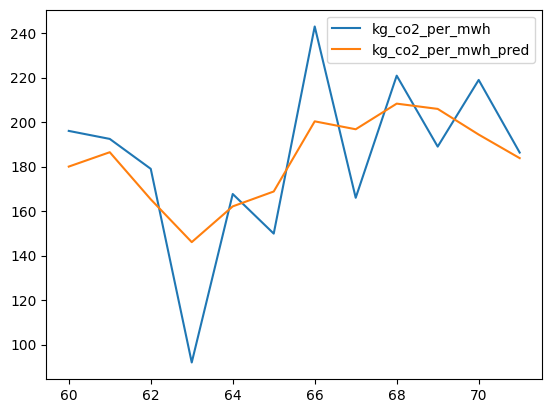

In [129]:
gen_snap[gen_snap.ba_code == 'CISO'][['kg_co2_per_mwh','kg_co2_per_mwh_pred']].plot()

<Axes: >

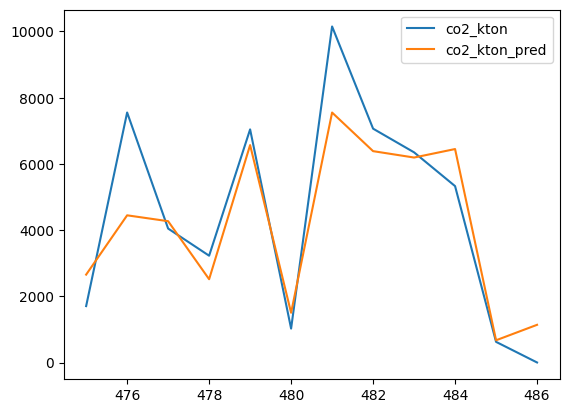

In [144]:
gen_snap[gen_snap.ba_code == 'TVA'][['co2_kton','co2_kton_pred']].plot()